# Airbnb Project

## 🎯 Project Objective

In this challenge, we are tasked with building a predictive model that can estimate the **success level of an Airbnb listing**.  
Success is not provided directly in the dataset — instead, it is a **target label that we define** based on engineered features.

Each listing will be categorized into one of three classes:

- **Excellent**
- **Good**
- **Average**

These categories are derived from listing characteristics such as pricing, reviews, availability, and host metrics.  
The goal is to train a model that can reliably predict this success label using the processed and engineered features.


## 🧭 Project Workflow Overview

Conducting this project has been carried out through a clearly defined step-by-step process:

1. **Data Import & Initial Cleaning**  
   - Load the dataset, begin data cleaning, and identify the most relevant features to carry forward.

2. **Exploratory Data Analysis (EDA)**  
   - Visualize and analyze the dataset to uncover trends, spot anomalies, and guide feature selection.  
   - Use insights from EDA to inform how we will categorize listing performance.

3. **Feature Engineering**  
   - Create new variables from raw data to better capture patterns in reviews, availability, pricing, and listing attributes.  
   - These features form the backbone of our predictive modeling.

4. **Model Building**  
   - Train a classification model to predict listing success based on the engineered features.

5. **Model Evaluation**  
   - Assess performance using appropriate metrics (e.g., accuracy, precision, recall).  
   - Conduct train-test splitting to validate generalizability.

6. **Findings & Reflection**  
   - Summarize key insights derived from the analysis and model.  
   - Discuss any project limitations and areas for future improvement or expansion.


### Observe data

In [1]:
#  Cell 1 · Import core library & raw Airbnb data
#  --------------------------------------------------------------
#  WHAT:   • Load pandas (data-manipulation backbone)
#          • Read the main listings file from disk
#  WHY:    All downstream cleaning, EDA, and modelling will
#          build on this DataFrame (`listings_raw`).
# ───────────────────────────────────────────────────────────────

import pandas as pd

# Path to the InsideAirbnb CSV
DATA_PATH = "listings.csv"

# Load once; keep an immutable copy for reference if needed
listings_raw = pd.read_csv(DATA_PATH)

print(f"Loaded {len(listings_raw):,} listings — {listings_raw.shape[1]} columns")
listings_raw.head(3)

Loaded 87,946 listings — 75 columns


/var/folders/0t/bhkqsc_n6pg2n4b2dlx2d_gr0000gn/T/ipykernel_31115/2422622075.py:15: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_raw = pd.read_csv(DATA_PATH)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26


### Cleaning Data

In [2]:
#  Cell 2 · Inspect raw column names
#  --------------------------------------------------------------
#  WHAT:   Display the full list of columns in the raw dataset.
#  WHY:    • Gives a quick overview of what’s available.  
#          • Helps plan which columns to keep, drop, or transform.
# ───────────────────────────────────────────────────────────────

pd.set_option("display.max_columns", None)      # show them all, no wrap
print("Column names in listings_raw:\n")
print(list(listings_raw.columns))
pd.reset_option("display.max_columns")

Column names in listings_raw:

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60'

In [3]:
#  Cell 3 · Cleaning -- Round 1 : drop obviously irrelevant columns
#  --------------------------------------------------------------
#  WHAT:   Remove URL links, verbose text descriptions, images,
#          scraped-metadata timestamps, and licence field.
#  WHY:    • They carry no predictive value for listing success.
#          • Many of them are high-cardinality text that would bloat RAM.
# ───────────────────────────────────────────────────────────────

# Work on a copy so we always have listings_raw as reference
df = listings_raw.copy()

UNNECESSARY_COLS = [
    'listing_url', 'scrape_id', 'last_scraped', 'source',
    'name', 'description', 'neighborhood_overview', 'picture_url',
    'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'host_about',
    'calendar_updated', 'calendar_last_scraped',
    'license'
]

df.drop(columns=UNNECESSARY_COLS, inplace=True)

print(f"After round-1 drop: {df.shape[1]} columns remain")

After round-1 drop: 59 columns remain


In [4]:
#  Cell 4 · Cleaning -- Round 2 : inspect missing values
#  --------------------------------------------------------------
#  WHAT:   Show how many NaNs each column contains so we can
#          decide which to impute, drop, or leave as-is.
#  WHY:    Missing-value strategy is a core part of the cleaning
#          phase and later feature-engineering decisions.
# ───────────────────────────────────────────────────────────────

na_counts = df.isna().sum().sort_values(ascending=False)

# Display only columns with ≥ 1 missing value
na_counts = na_counts[na_counts > 0]

print(f"{na_counts.shape[0]} columns contain missing values:\n")
display(na_counts)

33 columns contain missing values:



neighbourhood_group_cleansed    87946
bathrooms                       87946
neighbourhood                   40755
host_neighbourhood              39867
bedrooms                        32774
host_response_time              28918
host_response_rate              28918
host_acceptance_rate            25188
review_scores_value             23126
review_scores_location          23125
review_scores_checkin           23125
review_scores_communication     23095
review_scores_accuracy          23093
review_scores_cleanliness       23081
review_scores_rating            22158
last_review                     22158
first_review                    22158
reviews_per_month               22158
host_location                   18778
beds                             1134
host_is_superhost                 932
bathrooms_text                    103
host_listings_count                 5
host_since                          5
host_identity_verified              5
host_has_profile_pic                5
host_total_l

In [5]:
#  Cell 5 · Cleaning -- Round 3 : drop “mostly-missing” columns
#  --------------------------------------------------------------
#  WHAT:   Remove columns where > 40 % of rows are NaN *and* the
#          content is either redundant with another column or not
#          needed for our success-label definition.
#  WHY:    Imputing so much missing data would add noise; these
#          fields offer little extra signal given what we are
#          already keeping (e.g. `neighbourhood_cleansed`).
# ───────────────────────────────────────────────────────────────

MOSTLY_MISSING = [
    # 45 %–100 % NaN, and either redundant or low value
    'neighbourhood',               # free-text, overlaps with `neighbourhood_cleansed`
    'neighbourhood_group_cleansed',# always NaN for London
    'host_neighbourhood',          # host-supplied free-text, poor consistency
    'bathrooms'                    # string mix; we use `bathrooms_cap` engineered later
]

df.drop(columns=MOSTLY_MISSING, inplace=True)

print(f"After dropping high-NaN cols: {df.shape[1]} columns remain")

After dropping high-NaN cols: 55 columns remain


In [6]:
#  Cell 6 · Cleaning -- Round 4 : split DataFrame into themed blocks
#  --------------------------------------------------------------
#  WHAT:   Break the wide table into logically coherent “mini-tables”
#          so each can be cleaned / engineered with specialized code
#          before re-merging on the listing `id`.
#  WHY:    • Keeps cleaning notebooks readable.  
#          • Lets us drop or impute columns in one block without
#            scrolling through unrelated variables.  
#          • All mini-tables preserve `id`, making a left-join trivial.
# ───────────────────────────────────────────────────────────────

# --- Host-level information ------------------------------------
host_cols = [
    'id',
    'host_since',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
    'host_has_profile_pic', 'host_identity_verified',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms'
]
host_info = df[host_cols].copy()


# --- Property-level information --------------------------------
prop_cols = [
    'id',
    'property_type', 'room_type',
    'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
    'amenities'
]
prop_info = df[prop_cols].copy()


# --- Location information --------------------------------------
loc_cols = [
    'id',
    'neighbourhood_cleansed',
    'latitude', 'longitude'
]
loc_info = df[loc_cols].copy()


# --- Price & availability information --------------------------
price_cols = [
    'id',
    'price',
    'minimum_nights', 'maximum_nights',
    'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
    'has_availability',
    'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'instant_bookable'
]
price_avail_info = df[price_cols].copy()


# --- Review-related information --------------------------------
review_cols = [
    'id',
    'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'first_review', 'last_review',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]
review_info = df[review_cols].copy()

print("Blocks created:")
print(f"  host_info           →  {host_info.shape}")
print(f"  prop_info           →  {prop_info.shape}")
print(f"  loc_info            →  {loc_info.shape}")
print(f"  price_avail_info    →  {price_avail_info.shape}")
print(f"  review_info         →  {review_info.shape}")

Blocks created:
  host_info           →  (87946, 14)
  prop_info           →  (87946, 8)
  loc_info            →  (87946, 4)
  price_avail_info    →  (87946, 16)
  review_info         →  (87946, 14)


#### Cleaning Price & Availability block

In [7]:
#  Cell 7 · Inspect missing-value counts in price_avail_info
#  --------------------------------------------------------------
#  WHAT:   Display how many NaNs each column contains, sorted so
#          the worst offenders appear first.
#  WHY:    Guides the next cleaning decisions—drop, impute, or flag.
# ───────────────────────────────────────────────────────────────

na_counts = (price_avail_info.isna().sum().sort_values(ascending=False))

# Show only columns that actually have missing values
na_counts = na_counts[na_counts > 0]

print("Missing-value tally (descending):")
display(na_counts)

Missing-value tally (descending):


minimum_minimum_nights    1
maximum_minimum_nights    1
minimum_maximum_nights    1
maximum_maximum_nights    1
minimum_nights_avg_ntm    1
maximum_nights_avg_ntm    1
dtype: int64

In [8]:
#  Cell 8 · Drop rows missing the advanced stay-length columns
#  --------------------------------------------------------------
#  WHAT:   Remove listings that have **any** NaN in the six
#          advanced stay-length columns.  These fields matter
#          for later feature engineering, so we keep only rows
#          where they are all present.
#  WHY:    Keeps the cleaning logic simple—no guessing / imputation
#          for these specialised policy metrics.
# ───────────────────────────────────────────────────────────────

staylen_cols = [
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm'
]

price_avail_clean = price_avail_info.dropna(subset=staylen_cols).copy()

print(f"Rows kept after dropping NaNs in stay-length columns: {len(price_avail_clean):,}")

Rows kept after dropping NaNs in stay-length columns: 87,945


In [9]:
#  Cell 9 · Clean the price column
#  --------------------------------------------------------------
#  WHAT:   Strip currency symbols / commas and cast to float.
#  WHY:    A numeric price is required for log-transforming and
#          for use in the predictive model.
# ───────────────────────────────────────────────────────────────

# 1. Ensure dtype is string, then remove '$' and ',' characters
price_avail_clean['price'] = (price_avail_clean['price'].astype(str).str.replace(r'[$,]', '', regex=True))

# 2. Convert to numeric (pandas gives float64)
price_avail_clean['price'] = pd.to_numeric(price_avail_clean['price'])

# 3. Quick sanity check
print("Price column cleaned:")
print(price_avail_clean['price'].describe(percentiles=[.25, .5, .75]).round(2))

Price column cleaned:
count    87945.00
mean       181.35
std        486.18
min          0.00
25%         63.00
50%        110.00
75%        193.00
max      80100.00
Name: price, dtype: float64


In [10]:
#  Cell 10 · Binary-encode ‘t/f’ flags
#  --------------------------------------------------------------
#  WHAT:   Convert the textual booleans in the price-availability
#          block into true numeric 0/1 columns.
#  WHY:    • scikit-learn models accept only numeric inputs.  
#          • Keeps the later ColumnTransformer simple (no encoder
#            needed for these two fields).
# ───────────────────────────────────────────────────────────────

bin_map = {'t': 1, 'f': 0}

price_avail_clean['has_availability'] = (price_avail_clean['has_availability'].map(bin_map).astype(int))

price_avail_clean['instant_bookable'] = (price_avail_clean['instant_bookable'].map(bin_map).astype(int))

# quick confirmation
print(price_avail_clean[['has_availability', 'instant_bookable']].head())

   has_availability  instant_bookable
0                 1                 1
1                 1                 0
2                 1                 0
3                 1                 0
4                 1                 0


In [11]:
#  Cell 11 · Price/Availability — list all column names
#  --------------------------------------------------------------
#  WHAT:   Display every column in the price & availability block
#          so we can eyeball which ones to keep or drop.
#  WHY:    Quick visual inspection before pruning.
# ───────────────────────────────────────────────────────────────

print("Columns in price_avail_info:\n")
for col in price_avail_clean.columns:
    print(" •", col)

Columns in price_avail_info:

 • id
 • price
 • minimum_nights
 • maximum_nights
 • minimum_minimum_nights
 • maximum_minimum_nights
 • minimum_maximum_nights
 • maximum_maximum_nights
 • minimum_nights_avg_ntm
 • maximum_nights_avg_ntm
 • has_availability
 • availability_30
 • availability_60
 • availability_90
 • availability_365
 • instant_bookable


In [12]:
#  Cell 12 · Prune low-value / redundant columns (price block)
#  --------------------------------------------------------------
#  WHAT:   Remove advanced stay-length aggregates and partial
#          rolling-window availability counts that our project
#          will not use.
#  WHY:    Reduces feature noise; keeps only essential availability signals.
# ───────────────────────────────────────────────────────────────

COLS_TO_DROP = [
    'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
    'availability_30', 'availability_60', 'availability_90'
]

price_avail_info_clean = price_avail_clean.drop(columns=COLS_TO_DROP, errors='ignore')

print(f"Price/availability block now has {price_avail_info_clean.shape[1]} columns")
price_avail_info_clean.head(3)

Price/availability block now has 7 columns


,id,price,minimum_nights,maximum_nights,has_availability,availability_365,instant_bookable
0,92644,42.0,2,730,1,217,1
1,93015,175.0,5,240,1,40,0
2,13913,79.0,1,29,1,360,0


#### Clean the Review Information

In [13]:
# Cell 13 – Impute Missing Review Scores (Streamlined)
# --------------------------------------------------------------
# WHAT:
# • Fill NaN in 'review_scores_rating' with 0 — represents “no rating yet.”
#
# WHY:
# • We’ll use 0 as a placeholder and handle it during feature engineering
#   by creating flags and adjusted rating features.
# --------------------------------------------------------------

review_info['review_scores_rating'] = review_info['review_scores_rating'].fillna(0)


In [14]:
# Cell 14 – Drop Unused Review Subscores and Metadata
# --------------------------------------------------------------
# WHAT:
# • Remove granular sub-scores and timestamp fields that won't be used.
#
# WHY:
# • Keep only high-signal columns ('number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating').
#   The rest are redundant.
# --------------------------------------------------------------

cols_to_drop = [
    'first_review', 'last_review',          
    'number_of_reviews_l30d',               
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    'reviews_per_month'                     
]

review_info_clean = review_info.drop(columns=cols_to_drop).copy()

print(f"Review block now has {review_info_clean.shape[1]} columns")
display(review_info_clean.head(3))


Review block now has 4 columns


,id,number_of_reviews,number_of_reviews_ltm,review_scores_rating
0,92644,216,9,4.57
1,93015,38,2,4.82
2,13913,41,11,4.80


#### Clean the Property Information

In [15]:
#  Cell 15 · Property block – parse bathrooms_text → numeric
#  --------------------------------------------------------------
#  WHAT:   Convert strings like "1.5 shared baths", "Half-bath",
#          "0 shared baths" into a single numeric column `bathrooms`.
#
#  WHY:    A numeric count lets us compute ratios (baths_per_guest)
#          and feed the feature directly to the model.
# ───────────────────────────────────────────────────────────────

import re
import numpy as np

def parse_bathrooms(text: str) -> float:
    """
    Extract a numeric bathroom count from the Airbnb bathrooms_text field.
       • 'Half-bath', 'Shared half-bath', 'Private half-bath' → 0.5
       • '1.5 shared baths' → 1.5
       • '0 shared baths'   → 0
       • Non-string or no number found → np.nan
    """
    if not isinstance(text, str):
        return np.nan

    text = text.lower().strip()

    # Handle explicit half-bath phrases first
    if "half-bath" in text or text == "half-bath":
        return 0.5

    # Regular expression to capture the first float or int in the string
    match = re.search(r"\d+(\.\d+)?", text)
    if match:
        return float(match.group())

    return np.nan


# Apply parser
prop_info["bathrooms"] = prop_info["bathrooms_text"].apply(parse_bathrooms)

# Quick sanity check
print(prop_info["bathrooms"].describe())
print("\nExample mappings:")
print(prop_info.loc[prop_info["bathrooms_text"].str.contains("half", na=False),
               ["bathrooms_text", "bathrooms"]].head())

count    87843.000000
mean         1.331022
std          0.672948
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max         48.000000
Name: bathrooms, dtype: float64

Example mappings:
        bathrooms_text  bathrooms
317   Shared half-bath        0.5
803   Shared half-bath        0.5
1984  Shared half-bath        0.5
3123  Shared half-bath        0.5
4789  Shared half-bath        0.5


In [16]:
#  Cell 16 · Fill missing counts with block medians
# --------------------------------------------------------------
for col in ["bathrooms", "bedrooms", "beds"]:
    prop_info[col] = prop_info[col].fillna(prop_info[col].median())

In [17]:
#  Cell 17 · Remove free-text columns no longer needed
# --------------------------------------------------------------
prop_info.drop(columns=["bathrooms_text", "amenities", "room_type"], inplace=True)

In [18]:
#  Cell 18 · Normalize and consolidate `property_type`
#  --------------------------------------------------------------
#  WHAT:   • Convert all entries in `property_type` to lowercase.
#          • Use regex-based replacements to map dozens of near-duplicate
#            values (e.g., “entire rental unit”, “private room in loft”)
#            into a small set of clean categories:  
#              – apartment  
#              – house  
#              – shared room  
#              – hotel  
#              – unique stay  
#          • Finally, catch any remaining “private room in …” patterns
#            and map them to “private room.”
#
#  WHY:    • Ensures every category is consistent and human-readable,
#            preventing thousands of sparse one-hot columns.  
#          • Groups semantically equivalent listings so the model can
#            learn robust patterns (e.g., all “apartment” types together).  
#          • Reduces feature cardinality, speeds up training, and improves
#            interpretability of the final one-hot encoded variables.

prop_info['property_type'] = prop_info['property_type'].str.lower()

# Objective 7.2: Group. Similar Property Types
prop_info['property_type'] = prop_info['property_type'].replace({
    'private room in rental unit': 'apartment',
    'entire rental unit': 'apartment',
    'private room in condo': 'apartment',
    'entire condo': 'apartment',
    'room in serviced apartment': 'apartment',
    'entire serviced apartment': 'apartment',
    'private room in loft': 'apartment',
    'entire loft': 'apartment',
    'room in aparthotel': 'apartment',
    'floor': 'apartment',
    'room in rental unit': 'apartment',
    'entire townhouse': 'house',
    'private room in home': 'house',
    'entire home': 'house',
    'private room in townhouse': 'house',
    'entire guesthouse': 'house',
    'private room in guesthouse': 'house',
    'entire cabin': 'house',
    'entire vacation home': 'house',
    'entire cottage': 'house',
    'private room in guest suite': 'house',
    'entire bungalow': 'house',
    'private room in bungalow': 'house',
    'entire home/apt': 'house',
    'private room in cabin': 'house',
    'entire villa': 'house',
    'entire chalet': 'house',
    'entire chalet': 'house',
    'shared room in home': 'shared room',
    'shared room in condo': 'shared room',
    'shared room in loft': 'shared room',
    'shared room in rental unit': 'shared room',
    'shared room': 'shared room',
    'shared room in bungalow': 'shared room',
    'shared room in bed and breakfast': 'shared room',
    'shared room in townhouse': 'shared room',
    'shared room in hostel': 'shared room',
    'shared room in serviced apartment': 'shared room',
    'shared room in villa': 'shared room',
    'shared room in guest suite': 'shared room',
    'shared room in farm stay': 'shared room',
    'shared room in bus': 'shared room',
    'shared room in guesthouse': 'shared room',
    'shared room in boutique hotel': 'shared room',
    'shared room in earthen home': 'shared room',
    'shared room in vacation home': 'shared room',
    'shared room in religious building': 'shared room',
    'shared room in tent': 'shared room',
    'room in boutique hotel': 'hotel',
    'room in hotel': 'hotel',
    'room in bed and breakfast': 'hotel',
    'room in bed and breakfast': 'hotel',
    'houseboat': 'unique stay',
    'tiny home': 'unique stay',
    'private room': 'unique stay',
    'private room in nature lodge': 'unique stay',
    'private room in yurt': 'unique stay',
    'boat': 'unique stay',
    'entire place': 'unique stay',
    'private room in villa': 'unique stay',
    'private room in houseboat': 'unique stay',
    'hut': 'unique stay',
    "private room in shepherd's hut": 'unique stay',
    'yurt': 'unique stay',
    "shepherd’s hut": 'unique stay',
    'camper/rv': 'unique stay',
    'private room in tiny home': 'unique stay',
    'private room in hut': 'unique stay',
    'earthen home': 'unique stay',
    'private room in lighthouse': 'unique stay',
    'private room in floor': 'unique stay',
    'private room in island': 'unique stay',
    'private room in earthen home': 'unique stay',
    'barn': 'unique stay',
    'private room in treehouse': 'unique stay',
    'campsite': 'unique stay',
    'private room in farm stay': 'unique stay',
    'religious building': 'unique stay',
    'private room in boat': 'unique stay',
    "private room in shepherd's hut": 'unique stay',
    'casa particular': 'unique stay',
    'private room in castle': 'unique stay',
    'dome': 'unique stay',
    'tent': 'unique stay',
    'private room in religious building': 'unique stay',
    'minsu': 'unique stay',
    'riad': 'unique stay',
    'island': 'unique stay',
    'castle': 'unique stay',
    'tower': 'unique stay',
    'shipping container': 'unique stay',
    'treehouse': 'unique stay',
    'private room in cave': 'unique stay',
    'farm stay': 'unique stay'
})

#  Group "private room in..." into "private room"
prop_info['property_type'] = prop_info['property_type'].replace({
    'entire guest suite': 'private room',
    'private room in serviced apartment': 'private room',
    'private room in bed and breakfast': 'private room',
    'private room in casa particular': 'private room',
    'private room in vacation home': 'private room',
    'private room in cottage': 'private room',
    'private room in chalet': 'private room',
    'private room in camper/rv': 'private room',
    'private room in hostel': 'private room'
})

prop_info_clean = prop_info.copy()

prop_info_clean

,id,property_type,accommodates,bedrooms,beds,bathrooms
0,92644,apartment,2,2.0,2.0,1.5
1,93015,apartment,5,2.0,3.0,1.0
2,13913,apartment,1,2.0,1.0,1.0
3,15400,apartment,2,1.0,1.0,1.0
4,93734,apartment,2,2.0,1.0,1.0
...,...,...,...,...,...,...
87941,973781286754517228,apartment,3,1.0,2.0,1.0
87942,973801695874775338,apartment,2,1.0,1.0,1.0
87943,973811685656289740,house,7,1.0,5.0,2.0
87944,973882998775927897,house,10,5.0,5.0,1.0


#### Clean Host Information

In [19]:
#  Cell 19 · Host Info – Handle 'host_response_time'
#  --------------------------------------------------------------
#  WHAT:   Fill missing 'host_response_time' entries with 'unknown'.
#  WHY:    Keeping a placeholder allows the model to distinguish
#          between fast responders and unknown hosts.
# ───────────────────────────────────────────────────────────────

host_info['host_response_time'] = host_info['host_response_time'].fillna('unknown')

In [20]:
#  Cell 20 · Host Info – Handle 'host_is_superhost'
#  --------------------------------------------------------------
#  WHAT:   Fill missing values with the mode (most common value)
#          and map 't' → 1 and 'f' → 0.
#  WHY:    Superhost status is important for predicting trust and
#          listing success.
# ───────────────────────────────────────────────────────────────

host_info['host_is_superhost'] = host_info['host_is_superhost'].fillna(host_info['host_is_superhost'].mode()[0])
host_info['host_is_superhost'] = host_info['host_is_superhost'].astype(str).str.lower().map({'t': 1, 'f': 0})

In [21]:
# ───────────────────────────────────────────────────────────────
#  Cell 21 · Host Info – Handle 'host_identity_verified'
#  --------------------------------------------------------------
#  WHAT:   Fill missing values with the mode (most common value)
#          and map 't' → 1 and 'f' → 0.
#  WHY:    Verified hosts tend to be more trusted; converting this
#          feature to numeric makes it model-friendly.
# ───────────────────────────────────────────────────────────────

host_info['host_identity_verified'] = host_info['host_identity_verified'].fillna(host_info['host_identity_verified'].mode()[0])
host_info['host_identity_verified'] = host_info['host_identity_verified'].astype(str).str.lower().map({'t': 1, 'f': 0})


In [22]:
#  Cell 22 · Host Info – Drop irrelevant columns
#  --------------------------------------------------------------
#  WHAT:   Remove columns with redundant information (host_since,
#          acceptance rates, listing counts, etc.).
#  WHY:    Reduces noise; keeps only important trust / response features.
# ───────────────────────────────────────────────────────────────

columns_to_drop_host_info = [
    'host_has_profile_pic',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'host_listings_count',
    'calculated_host_listings_count',
    'host_total_listings_count',
    'host_response_rate',
    'host_since',
    'host_acceptance_rate'
]

host_info_clean = host_info.drop(columns=columns_to_drop_host_info).copy()

print(f"Host info cleaned: {host_info_clean.shape[1]} columns remaining")


Host info cleaned: 4 columns remaining


#### Merge the datasets into one

In [23]:
#  Cell 23 · Merge all cleaned mini-tables into final dataset
#  --------------------------------------------------------------
#  WHAT:   Join the cleaned location, price/availability, host,
#          property, and review blocks into one master DataFrame.
#  WHY:    The modelling stage needs a single unified table,
#          with 'id' as the linking key.
# ───────────────────────────────────────────────────────────────

merged_df = loc_info.merge(price_avail_info_clean, on='id', how='inner')
merged_df = merged_df.merge(host_info_clean, on='id', how='inner')
merged_df = merged_df.merge(prop_info_clean, on='id',how='inner')
merged_df = merged_df.merge(review_info_clean, on='id', how='inner')


# Drop ID here
merged_df = merged_df.drop(columns=['id'])

In [24]:
merged_df.columns

Index(['neighbourhood_cleansed', 'latitude', 'longitude', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'instant_bookable', 'host_response_time',
       'host_is_superhost', 'host_identity_verified', 'property_type',
       'accommodates', 'bedrooms', 'beds', 'bathrooms', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating'],
      dtype='object')

### Exploratory Data Analysis

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Price Data Analysis

Descriptive Statistics for Price:

The price distribution is heavily right-skewed,
with most listings clustered around the lower price range,
and a long tail of very expensive listings.

count    87945.000000
mean       181.350867
std        486.176975
min          0.000000
25%         63.000000
50%        110.000000
75%        193.000000
max      80100.000000
Name: price, dtype: float64


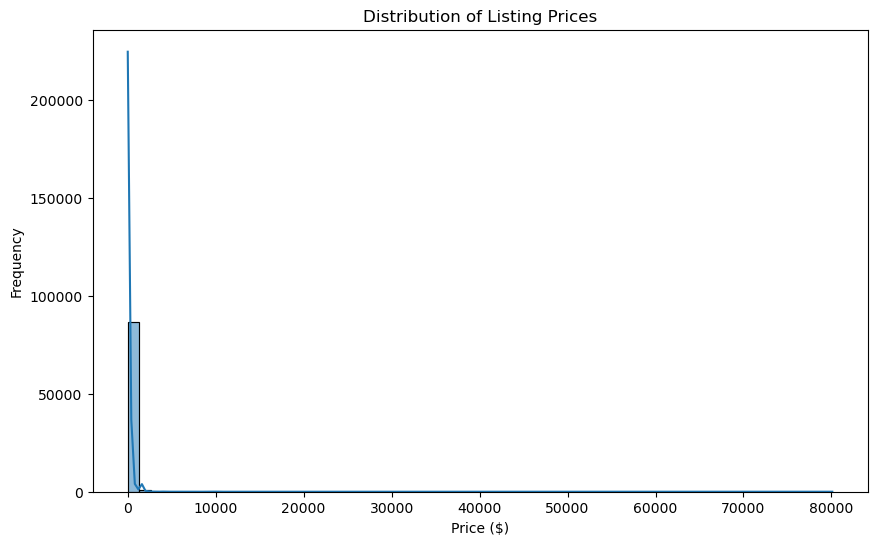

In [26]:
#  Cell 24 · EDA — Price Exploration (Descriptive Stats + Histogram)
#  --------------------------------------------------------------
#  WHAT:   Describe and visualise the distribution of `price`.
#  WHY:    • Understand the skewness and spread of listing prices.
#          • Confirm if transformations (e.g., log(price)) are needed.
# ───────────────────────────────────────────────────────────────

# 1. Descriptive statistics
print('Descriptive Statistics for Price:')
print('''
The price distribution is heavily right-skewed,
with most listings clustered around the lower price range,
and a long tail of very expensive listings.
''')

print(merged_df['price'].describe())

plt.figure(figsize=(10,6))
sns.histplot(merged_df['price'], bins=60, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

              price     log_price
count  87945.000000  87945.000000
mean     181.350867      4.752778
std      486.176975      0.846306
min        0.000000      0.000000
25%       63.000000      4.158883
50%      110.000000      4.709530
75%      193.000000      5.267858
max    80100.000000     11.291044


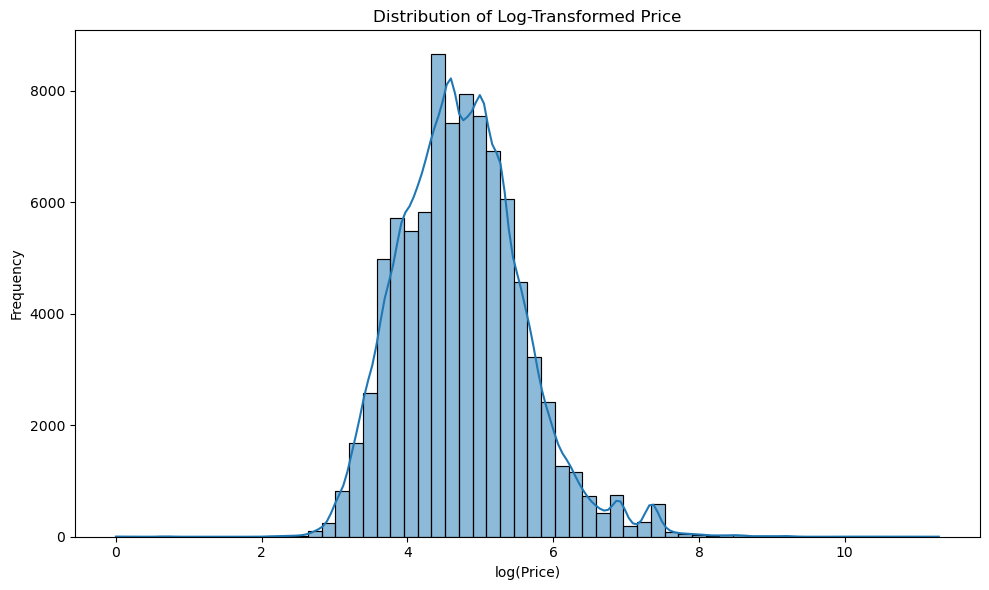

In [27]:
#  Cell 25 · Feature Engineering – Log-transform Price
#  --------------------------------------------------------------
#  WHAT:   Create a new feature `log_price` by applying a
#          log(1+x) transformation to the raw price.
#  WHY:    • Price is heavily right-skewed.  
#          • Log-scaling compresses extreme values, making the
#            feature more normally distributed and easier for
#            many models (especially linear models, boosting).
# ───────────────────────────────────────────────────────────────

merged_df['log_price'] = np.log1p(merged_df['price'])

print(merged_df[['price', 'log_price']].describe())

plt.figure(figsize=(10,6))
sns.histplot(merged_df['log_price'], bins=60, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 💡 Log-Transformed Price – Interpretation

The histogram above shows the distribution of the `price` feature after applying a `log(1 + x)` transformation.  
Originally, the raw `price` variable was heavily **right-skewed**, with a long tail caused by a small number of **extremely high-priced listings**.

---

### 🔁 This transformation helps in the following ways:

- **Normalizes the distribution**, making it more symmetric and bell-shaped.

- **Reduces the influence of outliers**, which can dominate models like linear regression and distort splits in tree-based models.

- **Improves model performance** by aligning with the assumptions of many machine learning algorithms — especially those favoring normally distributed inputs.

- The **peak of the transformed distribution** lies around `log(Price) ≈ 4.7`, which corresponds to a raw price of approximately **$110** — the **median price** in the dataset.

---

### ✅ Conclusion:
`log_price` is a well-behaved, model-friendly feature that preserves pricing signal while minimizing noise from extreme values.


In [28]:
# Mathematically view the Kurtosis and the Skewness of the log_Price data

print(f"Skewness of log_price: {merged_df['log_price'].skew()}")
print(f"Kurtosis of log_price: {merged_df['log_price'].kurtosis()}")

Skewness of log_price: 0.5776349643115056
Kurtosis of log_price: 1.018585967239587


## 📈 Skewness and Kurtosis Analysis of `log_price`

After log-transforming the `price` column, we evaluated its distributional shape to assess model readiness.

- **Skewness**: `0.578`  
  → Indicates a **slight right-skew**, but still well within acceptable bounds for most machine learning models.

- **Kurtosis**: `1.019`  
  → Suggests **mildly heavy tails**, though not extreme or problematic.

---

### ✅ Conclusion:
No further transformations are necessary.  
The `log_price` feature is now sufficiently normalized and ready for use in predictive modeling tasks.


In [29]:
#  Cell 27 · Drop original price column
#  --------------------------------------------------------------
#  WHAT:   Remove the original 'price' column after log-transforming.
#  WHY:    Avoids redundancy and multicollinearity, ensuring that
#          only 'log_price' is used in modeling.
# ───────────────────────────────────────────────────────────────

merged_df = merged_df.drop(columns=['price'])

#### Review Related Data Analysis

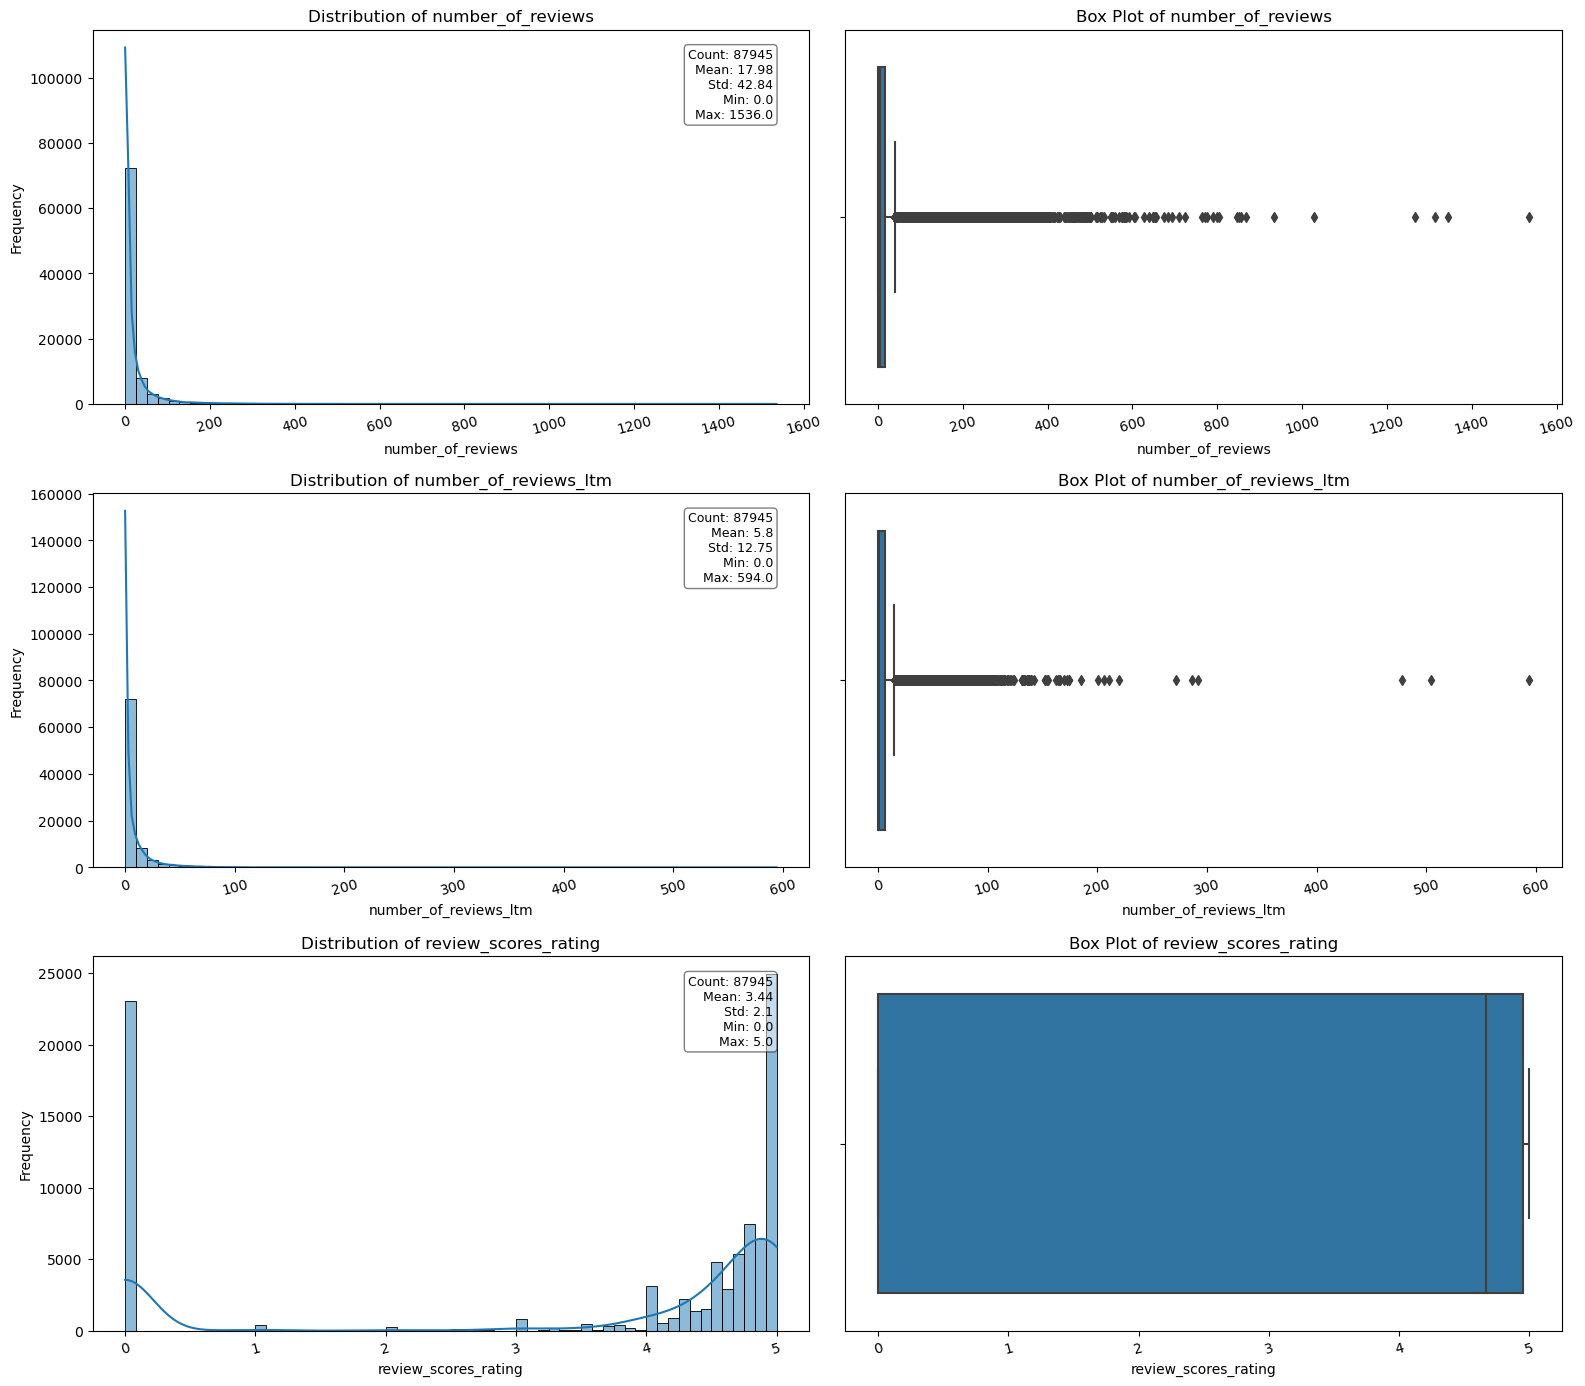

In [30]:
#  Cell 28 · Review Feature Analysis (EDA)
#  --------------------------------------------------------------
#  WHAT:   For each review-related feature (number of reviews,
#          number of reviews in the last 12 months, and rating score),
#          we print descriptive statistics, plot distributions, 
#          and show boxplots.
#
#  WHY:    • Understand the shape, skewness, and spread of review data.
#          • Detect extreme outliers that may affect modeling.
#          • Check if transformations (e.g., log, binning) are needed
#            before using these features.
# ───────────────────────────────────────────────────────────────

review_features = ['number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating']

# Set up 3x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))
axes = axes.flatten()

for i, feature in enumerate(review_features):
    # Histogram
    sns.histplot(merged_df[feature], bins=60, kde=True, ax=axes[i*2])
    axes[i*2].set_title(f'Distribution of {feature}')
    axes[i*2].set_xlabel(feature)
    axes[i*2].set_ylabel('Frequency')
    axes[i*2].tick_params(axis='x', rotation=15)

    # Add descriptive text
    desc = merged_df[feature].describe().round(2)
    description_text = f"Count: {desc['count']:.0f}\nMean: {desc['mean']}\nStd: {desc['std']}\nMin: {desc['min']}\nMax: {desc['max']}"
    axes[i*2].text(0.95, 0.95, description_text,
                   verticalalignment='top', horizontalalignment='right',
                   transform=axes[i*2].transAxes,
                   fontsize=9, bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

    # Boxplot
    sns.boxplot(x=merged_df[feature], ax=axes[i*2+1])
    axes[i*2+1].set_title(f'Box Plot of {feature}')
    axes[i*2+1].set_xlabel(feature)
    axes[i*2+1].tick_params(axis='x', rotation=15)

plt.tight_layout(pad=1.2)
plt.show()

## 📊 Raw Review Feature Distributions

---

### **1. `number_of_reviews`**
- **Distribution:**
  - Highly right-skewed — most listings have very few reviews.
  - Majority fall between 0 to 10 reviews.
  - Very few listings exceed 100 reviews; outliers exist well beyond 500+.

- **Boxplot:**
  - Strong concentration at low values.
  - Long tail with several extreme outliers above 100 reviews.

- **Interpretation:**
  → Most listings are either new or receive limited engagement.  
  → A small subset of listings are extremely popular with exceptionally high review counts.

---

### **2. `number_of_reviews_ltm`** *(Last 12 Months)*
- **Distribution:**
  - Similar to `number_of_reviews`, but even more right-skewed.
  - Most listings have 0–5 recent reviews.

- **Boxplot:**
  - Major clustering at the very low end.
  - Outliers exist around 100+, indicating very active recent listings.

- **Interpretation:**
  → Many listings haven't had recent guest activity — possibly due to seasonality or inactivity.  
  → A few high-performing listings show sustained recent engagement.

---

### **3. `review_scores_rating`**
- **Distribution:**
  - Bimodal: peaks at 0 (no rating) and near-perfect 5.0.
  - Majority of rated listings cluster between 4.5–5.0.

- **Boxplot:**
  - Clear distinction between unrated (0) and high-rated listings.
  - Narrow spread among rated listings — indicating most are rated highly.

- **Interpretation:**
  → Listings typically have either no rating (new/inactive) or high satisfaction (>4.5).  
  → Airbnb ratings tend to be **positively biased** — guests usually leave good reviews or none at all.


EDA for HAS_REVIEWS
count    87945.000000
mean         0.748047
std          0.434137
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: has_reviews, dtype: float64 

EDA for LOG_REVIEWS
count    87945.000000
mean         1.757202
std          1.485075
min          0.000000
25%          0.000000
50%          1.609438
75%          2.833213
max          6.216606
Name: log_reviews, dtype: float64 

EDA for HAS_REVIEWS_LTM
count    87945.000000
mean         0.508215
std          0.499935
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: has_reviews_ltm, dtype: float64 

EDA for LOG_REVIEWS_LTM
count    87945.000000
mean         1.017250
std          1.219624
min          0.000000
25%          0.000000
50%          0.693147
75%          1.945910
max          5.303305
Name: log_reviews_ltm, dtype: float64 

EDA for HAS_RATING
count    87945.000000
mean         0.

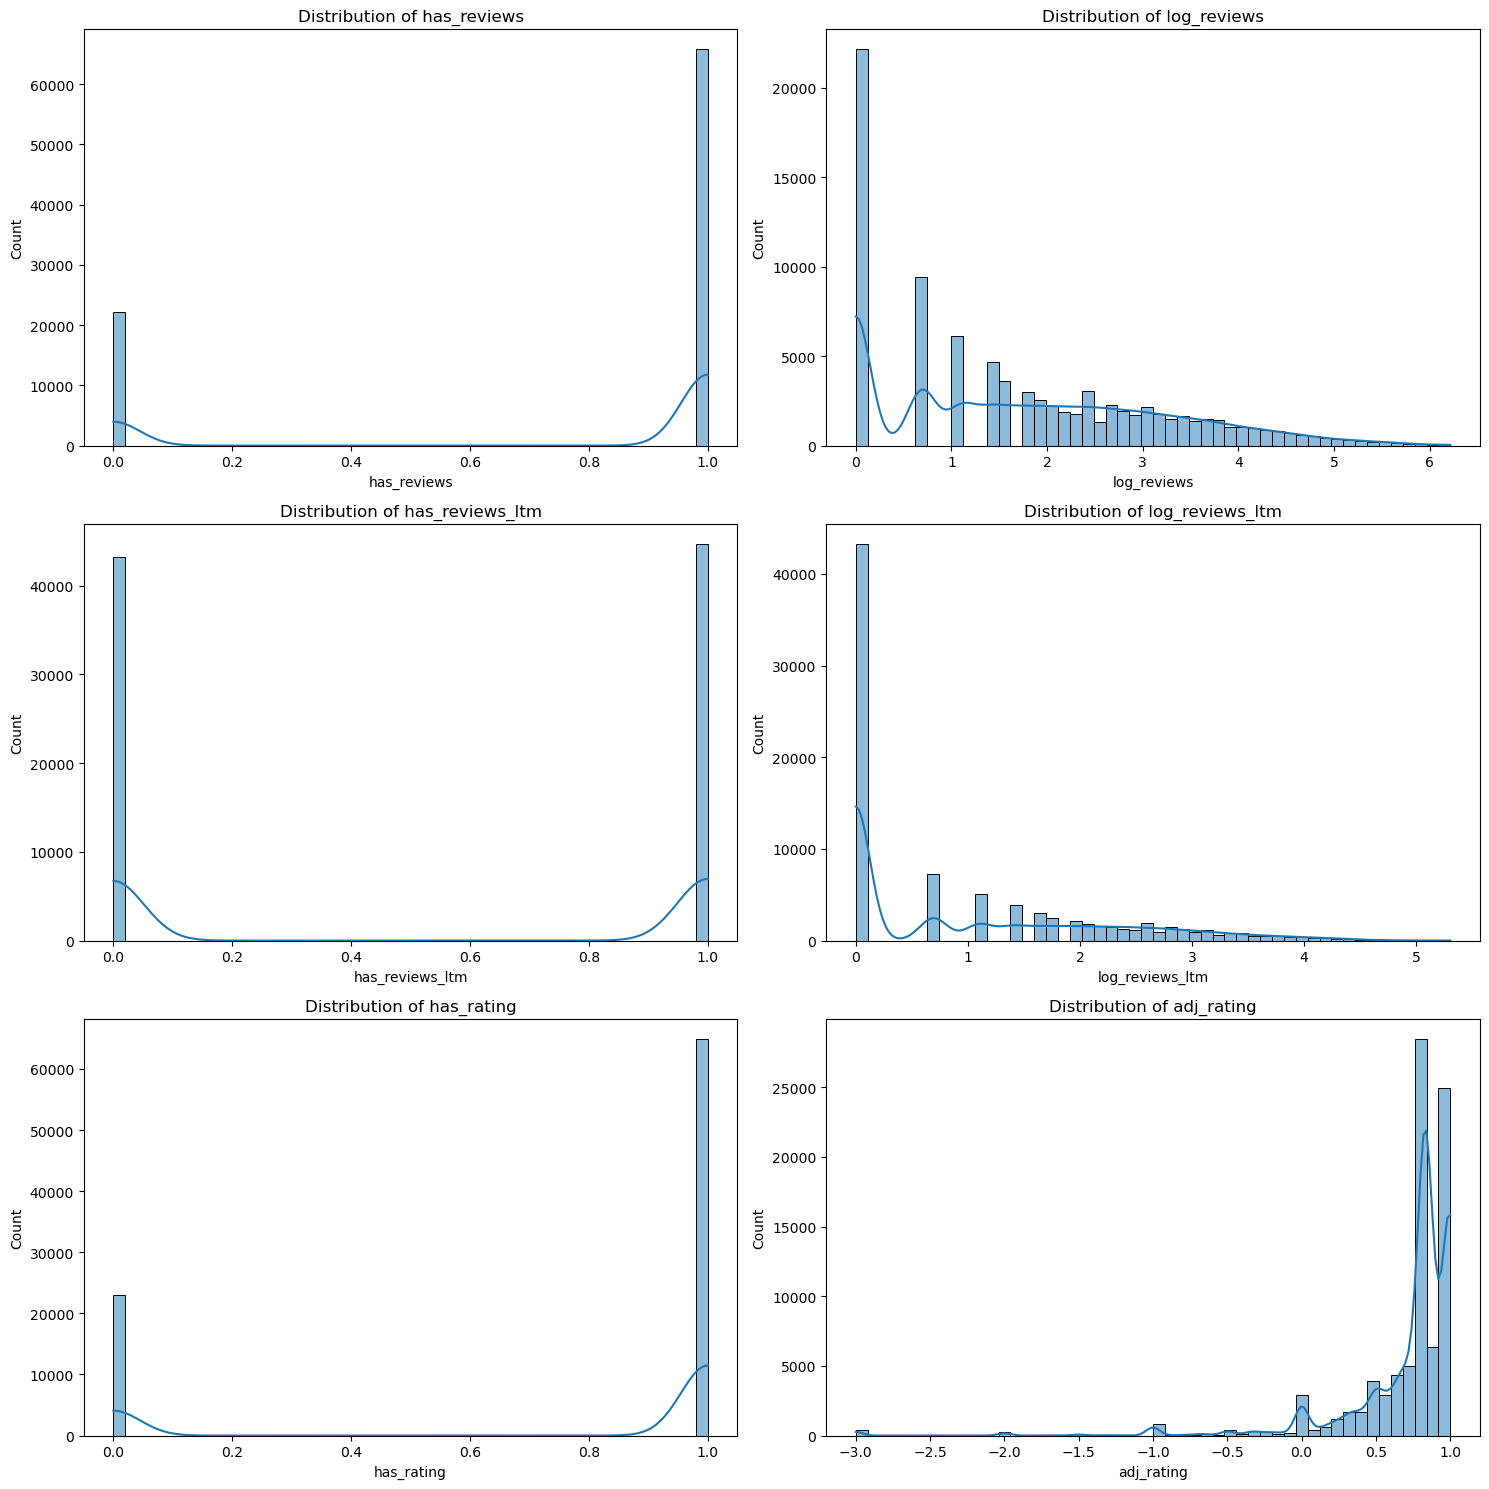

In [31]:
#  Cell 29 · Clean and Transform Review Features
#  --------------------------------------------------------------
#  WHAT:
#  • Cap outliers in review counts (total and LTM).
#  • Log-transform skewed numeric features.
#  • Handle missing ratings gracefully.
#  • Create binary "has reviews" flags.
#  WHY:
#  • Better feature scaling for model stability.
#  • Binary flags highlight important splits.
#  • Smoothed data → easier patterns for the model to find.
# ───────────────────────────────────────────────────────────────

# --- Clean total number of reviews ---
def fe_number_of_reviews(df, cap=500):
    df['reviews_cap'] = np.clip(df['number_of_reviews'], 0, cap)
    df['has_reviews'] = (df['reviews_cap'] > 0).astype(int)
    df['log_reviews'] = np.log1p(df['reviews_cap'])
    return df.drop(columns=['reviews_cap', 'number_of_reviews'])

# --- Clean number of reviews in last 12 months ---
def fe_reviews_ltm(df, cap=200):
    df['reviews_ltm_cap'] = np.clip(df['number_of_reviews_ltm'], 0, cap)
    df['has_reviews_ltm'] = (df['reviews_ltm_cap'] > 0).astype(int)
    df['log_reviews_ltm'] = np.log1p(df['reviews_ltm_cap'])
    return df.drop(columns=['reviews_ltm_cap', 'number_of_reviews_ltm'])

# --- Clean review_scores_rating ---
def fe_rating(df):
    df['has_rating'] = (df['review_scores_rating'] > 0).astype(int)
    rating_clean = df['review_scores_rating'].replace(0, np.nan)
    df['rating_filled'] = rating_clean.fillna(rating_clean.median())
    df['adj_rating'] = df['rating_filled'] - 4
    return df.drop(columns=['rating_filled', 'review_scores_rating'])

# --- Apply all cleaning functions ---
merged_df = fe_number_of_reviews(merged_df)
merged_df = fe_reviews_ltm(merged_df)
merged_df = fe_rating(merged_df)

# --- Visualize distributions and quick stats ---
review_features = ['has_reviews', 'log_reviews', 'has_reviews_ltm', 'log_reviews_ltm', 'has_rating', 'adj_rating']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for idx, feature in enumerate(review_features):
    # Description
    print(f"EDA for {feature.upper()}")
    print(merged_df[feature].describe(), "\n")

    # Plot
    sns.histplot(merged_df[feature], bins=50, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 📝 Review Feature Summary Analysis

---

### **1. `has_reviews`**
- **Distribution:**  
  Binary flag showing if a listing has received any reviews at all. Roughly 75% of listings have been reviewed at least once.

- **Insight:**  
  This tells us whether the property has ever attracted bookings with guest feedback.

- **Interpretation:**  
  Unreviewed listings could be brand new, inactive, or less desirable. Reviewed ones have some credibility.

---

### **2. `log_reviews`**
- **Distribution:**  
  Log-transformed count of total reviews. Most listings fall on the lower end (e.g. 0–3 on the log scale), with a long but compressed tail.

- **Insight:**  
  Listings with higher values are likely well-established and frequently booked.

- **Interpretation:**  
  Raw review counts were extremely skewed — the log scale helps preserve the signal without letting outliers dominate.

---

### **3. `has_reviews_ltm`** *(Last 12 Months)*
- **Distribution:**  
  Binary flag indicating if a listing received any reviews in the past year. Nearly even split between 0 and 1.

- **Insight:**  
  This is a strong indicator of recent activity and current market relevance.

- **Interpretation:**  
  A listing may have reviews historically but none recently — this flag helps distinguish those still attracting guests today.

---

### **4. `log_reviews_ltm`**
- **Distribution:**  
  Skewed but compressed due to log scale. Most values are under 2, with only a few very active listings going higher.

- **Insight:**  
  Captures ongoing engagement trends more clearly than total reviews.

- **Interpretation:**  
  Important for modeling how current demand correlates with other features like price and availability.

---

### **5. `has_rating`**
- **Distribution:**  
  Binary flag. About 74% of listings have a guest rating.

- **Insight:**  
  Similar to `has_reviews`, this simply tracks if the property has ever been rated.

- **Interpretation:**  
  Having a rating implies successful stays, not just bookings. Missing ratings can indicate either new listings or low review participation.

---

### **6. `adj_rating`**
- **Distribution:**  
  Adjusted score centered around 0, where 0 represents a neutral 4.0-star rating. Most values are between +0.5 and +1.0 (i.e., 4.5–5 stars).

- **Insight:**  
  Tells us how the property performs relative to an average guest experience.

- **Interpretation:**  
  Most hosts have high ratings; Airbnb reviews are positively biased. The adjusted scale helps models spot the subtle differences between good and excellent listings.


#### Host Data Analysis

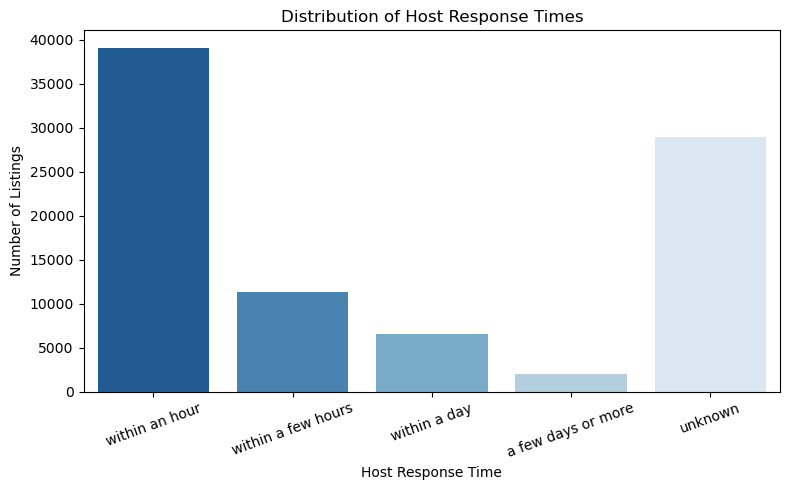

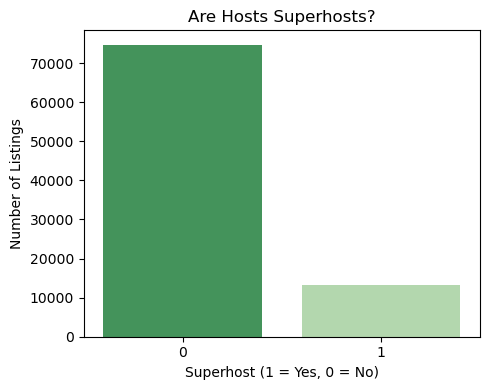

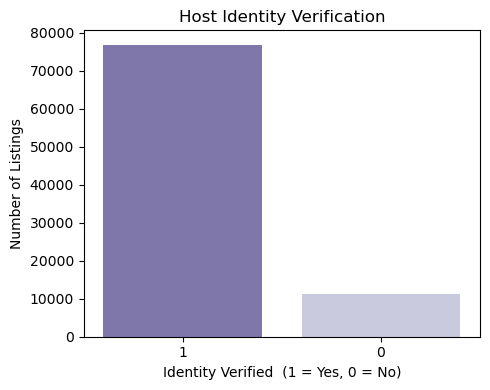

In [32]:
#  Cell 30 · Host-Related Features Visualization
#  --------------------------------------------------------------
#  WHAT:
#  • Plot distribution of host response times
#  • Plot distribution of Superhost status
#  • Plot distribution of host identity verification
#  WHY:
#  • Host behavior and credibility are critical trust factors
#  • These features may strongly impact booking likelihood and listing success
# ───────────────────────────────────────────────────────────────

# --- Plot Host Response Time ---
order = [
    'within an hour',
    'within a few hours',
    'within a day',
    'a few days or more',
    'unknown'
]

plt.figure(figsize=(8, 5))
sns.countplot(
    data=merged_df,
    x='host_response_time',
    order=order,
    palette='Blues_r'
)
plt.title('Distribution of Host Response Times')
plt.xlabel('Host Response Time')
plt.ylabel('Number of Listings')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# --- Plot Superhost Status ---
plt.figure(figsize=(5, 4))
sns.countplot(
    data=merged_df,
    x='host_is_superhost',
    palette='Greens_r'
)
plt.title('Are Hosts Superhosts?')
plt.xlabel('Superhost (1 = Yes, 0 = No)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

# --- Plot Host Identity Verification ---
plt.figure(figsize=(5, 4))
sns.countplot(
    data=merged_df,
    x='host_identity_verified',
    order=[1, 0],
    palette='Purples_r'
)
plt.title('Host Identity Verification')
plt.xlabel('Identity Verified  (1 = Yes, 0 = No)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


## 👤 Host-Related Feature Analysis

### 1. `host_response_time` — How fast do hosts reply to inquiries?

- **Distribution:**
  - **Within an hour**: ~39,000 listings  
  - **Within a few hours**: ~11,000 listings  
  - **Within a day**: ~6,700 listings  
  - **A few days or more**: ~2,100 listings  
  - **Unknown**: ~29,000 listings  

- **📌 Interpretation:**
  - The majority of hosts respond quickly — within an hour — suggesting high engagement and attentiveness.
  - A large portion of listings (~33%) fall under "unknown", likely reflecting listings with no prior messages or missing data.

- **🧠 Modeling Implication:**
  - This ordinal feature (0–3) helps capture host responsiveness.
  - Including a separate **missing response time flag** ensures the model can treat unknowns distinctly from slow responders.

---

### 2. `host_is_superhost` — Is the host a Superhost?

- **Distribution:**
  - ❌ `0` (Not a Superhost): ~75,000 listings  
  - ✅ `1` (Superhost): ~13,000 listings  

- **📌 Interpretation:**
  - Only about 15% of listings are managed by Superhosts.
  - Superhosts tend to maintain high standards, quick replies, and excellent guest experiences.

- **🧠 Modeling Implication:**
  - While the feature is imbalanced, being a Superhost may correlate with higher listing quality or price.
  - It can act as a strong signal when combined with reviews, ratings, or booking frequency.

---

### 3. `host_identity_verified` — Has the host verified their identity?

- **Distribution:**
  - ✅ `1` (Verified): ~77,000 listings  
  - ❌ `0` (Not Verified): ~11,000 listings  

- **📌 Interpretation:**
  - Most hosts have verified identities, which likely builds trust with guests.
  - Unverified hosts may be newer or less engaged with platform policies.

- **🧠 Modeling Implication:**
  - Although not highly variable, this binary trust feature may still contribute to predicting guest behavior or price, especially in combination with `is_superhost` or `instant_bookable`.

---


In [33]:
# Cell 31 · Feature Engineering – Host Data
# --------------------------------------------------------------
# WHAT:
# • Convert `host_response_time` into an ordinal scale and add a missing-value flag.
# • Convert `host_is_superhost` and `host_identity_verified` into clean binary features.
# • Drop original categorical/text features after transformation.
#
# WHY:
# • Ordinal encoding enables numeric modeling of response time (faster = lower).
# • Missing flag preserves the information where host response is unknown or unreported.
# • Clean binary features support trust-related modeling.
# --------------------------------------------------------------

# --- Ordinal encode response time ---
time_map = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3
}
merged_df['hrt_ord'] = merged_df['host_response_time'].map(time_map)

# --- Fill missing/unknown response time with fallback ordinal value (4 = worst)
merged_df['hrt_ord'] = merged_df['hrt_ord'].fillna(4)

# --- Create binary flag for missing or unknown response times ---
merged_df['hrt_missing'] = merged_df['host_response_time'].isna().astype(int)

# --- Clean binary encode: Superhost status ---
merged_df['is_superhost'] = merged_df['host_is_superhost'].astype(int)

# --- Clean binary encode: Host identity verification ---
merged_df['id_verified'] = merged_df['host_identity_verified'].astype(int)

# --- Drop original columns ---
merged_df.drop(columns=['host_response_time', 'host_is_superhost', 'host_identity_verified'], inplace=True)


#### Availability Features

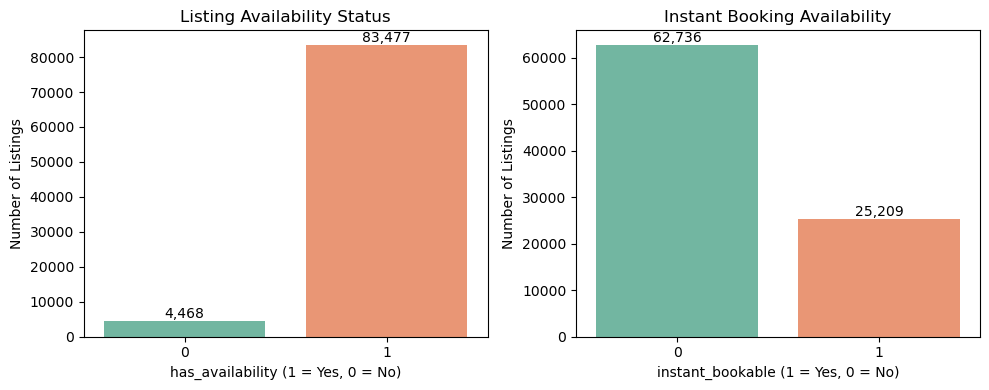

In [34]:
# Cell 32 · EDA – Binary Availability Features (with count labels)
# --------------------------------------------------------------
# WHAT:
#  • Visualize the distribution of binary availability indicators:
#      1. has_availability — whether the listing is available to book
#      2. instant_bookable — whether a listing can be booked instantly
#
# WHY:
#  • Understanding how many listings are actively bookable and their availability helps assess
#    the platform's inventory quality

# Binary features and titles
binary_avail_features = ['has_availability', 'instant_bookable']
titles = {
    'has_availability': 'Listing Availability Status',
    'instant_bookable': 'Instant Booking Availability'
}

# Set up side-by-side count plots
plt.figure(figsize=(10, 4))

for i, feature in enumerate(binary_avail_features):
    plt.subplot(1, 2, i + 1)
    ax = sns.countplot(data=merged_df, x=feature, palette='Set2')
    plt.title(titles[feature])
    plt.xlabel(f'{feature} (1 = Yes, 0 = No)')
    plt.ylabel('Number of Listings')

    # Add count labels above bars
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count:,}', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## ✅ Binary Availability Feature Analysis

### 1. **`has_availability` — Is the listing currently available?**

- **Distribution:**
  - `1` (Available): **83,477 listings** (~95%)
  - `0` (Unavailable): **4,468 listings** (~5%)

- **🧠 Interpretation:**
  - The vast majority of listings are **marked as available**, meaning the dataset mostly reflects **active and open listings**.
  - The small portion marked as unavailable may represent:
    - Temporarily paused calendars,
    - Delisted properties, or
    - Inactive hosts.
    
- **📌 Modeling Implication:**
  - The heavy skew toward `1` means this feature has **limited standalone predictive power**.
  - However, it may **enhance predictive value when combined with other features**.


### 2. **`instant_bookable` — Can guests book without host approval?**

- **Distribution:**
  - `0` (Not Instant Bookable): **62,736 listings** (~71%)
  - `1` (Instant Bookable): **25,209 listings** (~29%)

- **🧠 Interpretation:**
  - Only about **1 in 3 listings** are instant bookable — most hosts **prefer manual approval**.
  - Listings that allow instant booking often reflect:
    - Higher trust in guests,
    - More **experienced or responsive hosts**,
    - Possibly **professional operators**.

- **📌 Modeling Implication:**
  - This feature has **sufficient variance** to be informative.
  - It could be especially useful in models that aim to capture **guest-friendliness, professionalism**, or **frictionless booking experience**.


In [35]:
# Cell 33 · Descriptive stats for continuous availability features
# --------------------------------------------------------------
# WHAT: Summarize core stats for `minimum_nights`, `maximum_nights`, `availability_365`
# WHY:  Helps determine the right visualizations and whether outliers need treatment
# --------------------------------------------------------------

cont_avail_features = ['minimum_nights', 'maximum_nights', 'availability_365']

for feature in cont_avail_features:
    print(f"\n--- EDA for {feature.upper()} ---")
    print(merged_df[feature].describe())


--- EDA for MINIMUM_NIGHTS ---
count    87945.000000
mean         5.618102
std         23.572105
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64

--- EDA for MAXIMUM_NIGHTS ---
count    8.794500e+04
mean     6.712625e+03
std      1.770420e+06
min      1.000000e+00
25%      5.500000e+01
50%      3.650000e+02
75%      1.125000e+03
max      5.248556e+08
Name: maximum_nights, dtype: float64

--- EDA for AVAILABILITY_365 ---
count    87945.000000
mean       121.114185
std        134.554247
min          0.000000
25%          0.000000
50%         65.000000
75%        249.000000
max        365.000000
Name: availability_365, dtype: float64


## 🔍 Analysis: Continuous Availability Features (Before Engineering)

### 1. **`minimum_nights`**
- **📊 Distribution Insight:**
  - Median stay is just **2 nights**.
  - 75% of listings require **4 nights or fewer**.
  - Maximum observed: **1,125 nights** — with a standard deviation of **23.57**, indicating a strong presence of **outliers**.

- **💡 Interpretation:**
  - Most listings offer **short-stay flexibility**, catering to typical Airbnb guests.
  - A small subset of listings with very high minimums (e.g., **100+ nights**) likely serve **long-term rentals** or are **misconfigured/inactive**.
  - Suggests the need for **capping** or **flagging** extreme values before modeling.

---

### 2. **`maximum_nights`**
- **📊 Distribution Insight:**
  - Mean value is **6,712**, but this is heavily distorted by extreme outliers.
  - Maximum value exceeds **524 million nights**, likely a **placeholder or data entry error**.
  - 75th percentile is only **1,125 nights**, showing most listings fall well below the average.

- **💡 Interpretation:**
  - This variable is **extremely right-skewed** and **not reliable in raw form**.
  - Needs transformation — either:
    - **Log scaling** to normalize distribution, or
    - **Capping** at a reasonable upper bound (e.g., **1,095 nights = 3 years**).
  - Important for understanding host rental policies and allowable durations.

---

### 3. **`availability_365`**
- **📊 Distribution Insight:**
  - Values range from **0 to 365**, representing total days available per year.
  - **25% of listings are entirely unavailable** (0 days).
  - Median availability is **65 days**, suggesting listings are **partially active**.

- **💡 Interpretation:**
  - Listings tend to fall into two camps:
    - **Fully available year-round** (often professional hosts).
    - **Seasonal or limited availability** (likely part-time or casual hosts).
  - Valuable signal for distinguishing between **committed vs. occasional listings**.

---

### ✅ Summary
These continuous availability metrics reveal strong **skews**, **extreme values**, and important behavioral distinctions across hosts. Before feeding into models, they require:
- **Capping**, to suppress noisy outliers,
- **Transformation** (e.g., log-scale), to reduce skew,
- Or **binning**, to convert into interpretable categorical segments (e.g., high vs. low availability).


In [36]:
#  Cell 34 · Feature Engineering: Availability Features
#  --------------------------------------------------------------
#  WHAT:
#  This cell refines and transforms raw availability-related features
#  into more interpretable, scaled, and machine-learning-ready versions:
#
#  • `min_nights_cap`: Caps excessive minimum-night requirements to 30.
#  • `min_nights_flag_long`: Flags listings requiring >30 nights.
#  • `max_nights_cap`: Caps maximum nights to 365 to squash outliers.
#  • `log_max_nights`: Log-transforms capped max nights for smooth scaling.
#  • `has_avail_int` / `instant_book_int`: Explicit binary versions (0/1).
#  • `avail_bin`: Bins the `availability_365` into ['None', 'Low', 'Mid', 'High'].
#
#  WHY:
#  • Minimum/maximum stay limits have long tails with unrealistic values—
#    capping improves stability.
#  • Log-scaling compresses skewed numeric features, helping trees split better.
#  • Binary flags simplify interpretability and modeling.
#  • Binning availability into tiers adds semantic clarity and reduces noise.
#
#  Together, these steps increase model robustness while preserving
#  key signals about a listing’s availability and flexibility.
# ───────────────────────────────────────────────────────────────

def fe_availability(df):
    # ---- minimum nights ----
    df['min_nights_cap'] = df['minimum_nights'].clip(upper=30)     # cap 1–30
    df['min_nights_flag_long'] = (df['minimum_nights'] > 30).astype(int)

    # ---- maximum nights ----
    df['max_nights_cap'] = df['maximum_nights'].clip(upper=365)    # crazy values squashed
    df['log_max_nights'] = np.log1p(df['max_nights_cap'])          # 0-5.9 range

    # ---- has_availability & instant_bookable ----
    df['has_avail_int']   = df['has_availability'].astype(int)
    df['instant_book_int'] = df['instant_bookable'].astype(int)

    # ---- availability_365 ----
    # bins: 0 days, 1-90 (low), 91-180 (mid), 181-365 (high)
    df['avail_bin'] = pd.cut(df['availability_365'],
                             bins=[-1, 0, 90, 180, 365],
                             labels=['None', 'Low', 'Mid', 'High'])
        
    return df

merged_df = fe_availability(merged_df)

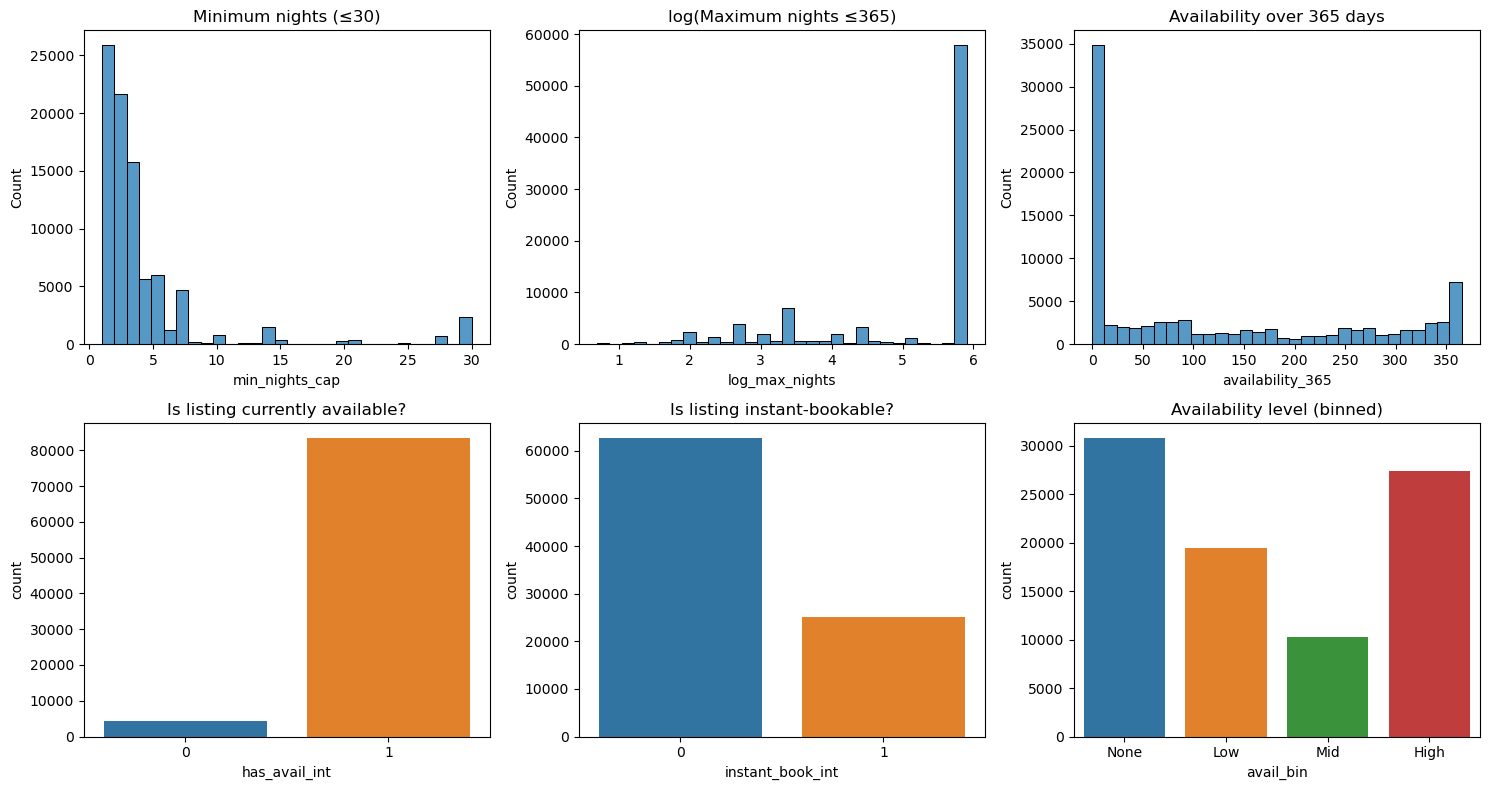

In [37]:
#  Cell 35 · Visualizing Engineered Availability Features
#  --------------------------------------------------------------
#  WHAT:
#  Plot distributions of the newly engineered availability features:
#
#  • `min_nights_cap` – capped minimum night requirement (≤ 30)
#  • `log_max_nights` – log-scaled maximum night cap (≤ 365)
#  • `availability_365` – total days available in a year
#  • `has_avail_int` – binary: is the listing bookable?
#  • `instant_book_int` – binary: can it be booked instantly?
#  • `avail_bin` – binned availability categories: ['None', 'Low', 'Mid', 'High']
#
#  WHY:
#  • Visualizing these features helps validate transformations, check for skew,
#    and ensure the feature engineering steps are working as intended.
#  • Also confirms appropriate spread and variance across bins for modeling.
# ───────────────────────────────────────────────────────────────
def plot_avail(df):
    fig, ax = plt.subplots(2, 3, figsize=(15, 8))
    ax = ax.flatten()

    # 1. Minimum nights (capped)
    sns.histplot(df['min_nights_cap'], bins=30, ax=ax[0])
    ax[0].set_title('Minimum nights (≤30)')

    # 2. Log of maximum nights (capped)
    sns.histplot(df['log_max_nights'], bins=30, ax=ax[1])
    ax[1].set_title('log(Maximum nights ≤365)')

    # 3. Raw availability (0–365)
    sns.histplot(df['availability_365'], bins=30, ax=ax[2])
    ax[2].set_title('Availability over 365 days')

    # 4. Binary: has availability
    sns.countplot(x=df['has_avail_int'], ax=ax[3])
    ax[3].set_title('Is listing currently available?')

    # 5. Binary: instant bookable
    sns.countplot(x=df['instant_book_int'], ax=ax[4])
    ax[4].set_title('Is listing instant-bookable?')

    # 6. Availability bins
    sns.countplot(x=df['avail_bin'], order=['None', 'Low', 'Mid', 'High'], ax=ax[5])
    ax[5].set_title('Availability level (binned)')

    plt.tight_layout()
    plt.show()

# Run the visualization
plot_avail(merged_df)


## 📊 Availability Feature Analysis (Post-Engineering)

### 1. **Minimum Nights (`min_nights_cap`)**
- **Distribution**: Highly right-skewed. Most listings have a **minimum stay of 1–4 nights**, with a sharp drop-off afterward.
- **Cap Applied**: Values were clipped at 30 nights to limit the impact of extreme outliers.
- **Interpretation**:
  - Short stays are the norm — ideal for vacationers and business travelers.
  - Longer-stay requirements (e.g., 15+ nights) exist but are rare and niche.

---

### 2. **Maximum Nights (`log_max_nights`)**
- **Distribution**: Still right-skewed after log transformation, but greatly stabilized.
- **Purpose of Log Scale**: Compress extreme values (some listings allowed up to 500 million nights!) into a model-friendly range.
- **Interpretation**:
  - Most listings support flexible, long-term bookings (30–365 days).
  - Transformation prepares the data for smoother modeling behavior.

---

### 3. **Availability Over 365 Days (`availability_365`)**
- **Distribution**: Bimodal.
  - One peak at **0 days** → listings likely inactive or paused.
  - Another spike at **365 days** → always available (commercial intent).
- **Interpretation**:
  - Listings are either seasonally paused or always on — no middle ground.
  - Important for capturing hosting behavior and listing activity level.

---

### 4. **Current Availability Flag (`has_avail_int`)**
- **Binary Flag**: 1 = Available, 0 = Not available.
- **Observation**: Vast majority of listings are **currently active** (~83,000).
- **Interpretation**:
  - Useful for excluding listings from prediction that are not actively being offered.
  - Could correlate with recent review activity or revenue patterns.

---

### 5. **Instant Booking Option (`instant_book_int`)**
- **Binary Flag**: 1 = Can be booked instantly, 0 = Requires host approval.
- **Observation**: About 25,000 listings support instant booking.
- **Interpretation**:
  - Hosts who enable instant booking likely optimize for **higher conversion**.
  - However, many still prefer manual control over guest approval.

---

### 6. **Binned Availability (`avail_bin`)**
- **Bins**:
  - `None`: 0 days
  - `Low`: 1–90 days
  - `Mid`: 91–180 days
  - `High`: 181–365 days
- **Observation**:
  - Significant presence in both `None` and `High` → listing activity is polarized.
- **Interpretation**:
  - Helps distinguish casual hosts from full-year professionals.
  - Ideal for classification tasks and explaining seasonal trends.

---

### ✅ Summary
These engineered availability features convert raw, skewed inputs into **interpretable**, **model-friendly variables**. They provide insight into **host behavior, listing commitment, and booking preferences**, and are likely to play a significant role in predicting listing success.


In [38]:
# Cell 35.5 – Encode avail_bin Ordinally
# --------------------------------------------------------------
# WHAT:
# • Convert the 'avail_bin' feature into a numeric ordinal scale.
#
# WHY:
# • 'avail_bin' reflects increasing levels of availability ('None' < 'Low' < 'Mid' < 'High'),
#   so we preserve this order for modeling while removing the string column.
# --------------------------------------------------------------

from sklearn.preprocessing import OrdinalEncoder

# Explicitly define the ordinal order
avail_order = [['None', 'Low', 'Mid', 'High']]
encoder = OrdinalEncoder(categories=avail_order)

merged_df['avail_bin_encoded'] = encoder.fit_transform(merged_df[['avail_bin']])


In [39]:
# Cell 36 – Drop Raw Availability Features
# --------------------------------------------------------------
# WHAT:
# • Remove unprocessed availability-related columns that were
#   transformed during feature engineering.
#
# WHY:
# • Prevent signal duplication and keep only clean, model-ready features.
# --------------------------------------------------------------

def drop_availability_features(df):
    cols_to_drop = [
        'minimum_nights',     # replaced by min_nights_cap
        'maximum_nights',     # replaced by log_max_nights
        'has_availability',   # replaced by has_avail_int
        'instant_bookable',    # replaced by instant_book_int
        'max_nights_cap'      # replaced by log_max_nights
    ]
    return df.drop(columns=cols_to_drop)

merged_df = drop_availability_features(merged_df)

#### Capacity and Layout

In [40]:
# Cell 37 – Capacity & Layout Feature Stats
# --------------------------------------------------------------
# WHAT:
# Print basic descriptive statistics for key capacity features:
# • accommodates – number of guests listing can host
# • bedrooms – number of sleeping rooms
# • beds – number of beds (includes sofa/futon)
# • bathrooms – number of bathrooms (may be fractional)
#
# WHY:
# Helps identify:
# • Outliers or missing values (e.g., 0-bedroom or 10-bathroom listings)
# • Relationships across space allocation (e.g., guests per room)
# • Candidates for feature engineering like ratios or capped/log values
# ───────────────────────────────────────────────────────────────

capacity_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms']

for feature in capacity_features:
    print(f"\n--- EDA for {feature.upper()} ---")
    print("Descriptive Statistics:\n")
    print(merged_df[feature].describe())



--- EDA for ACCOMMODATES ---
Descriptive Statistics:

count    87945.000000
mean         3.165399
std          1.980398
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

--- EDA for BEDROOMS ---
Descriptive Statistics:

count    87945.000000
mean         1.865291
std          0.884712
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

--- EDA for BEDS ---
Descriptive Statistics:

count    87945.000000
mean         1.793405
std          1.271005
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: beds, dtype: float64

--- EDA for BATHROOMS ---
Descriptive Statistics:

count    87945.000000
mean         1.330638
std          0.672652
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max         48.00000

## 🏠 Capacity & Layout Feature Analysis

---

### 1. `accommodates`

**📊 Distribution Insight:**
- **Mean**: 3.17 | **Median**: 2.0
- 75% of listings accommodate **4 guests or fewer**.
- **Max**: 16 – suggests a few listings support large groups.

**🧠 Interpretation:**
- Most listings are designed for **small groups or couples**.
- Listings accommodating 10+ guests likely serve **villas or large families**.
- **Modeling Tip**: Consider **binning** or **log-transforming** due to mild skew.

---

### 2. `bedrooms`

**📊 Distribution Insight:**
- **Mean**: 1.87 | **Median**: 2.0
- 75% of listings have **2 bedrooms or fewer**.
- **Max**: 50 – outliers possibly representing hotels or misentries.

**🧠 Interpretation:**
- The majority of units are **1–2 bedroom properties**.
- Extremely high values may need **capping or exclusion**.
- **Modeling Tip**: Use in ratio features like `accommodates / bedrooms`.

---

### 3. `beds`

**📊 Distribution Insight:**
- **Mean**: 1.79 | **Median**: 1.0
- Most listings offer **1–2 beds**.
- **Max**: 50 – similar outlier pattern as bedrooms.

**🧠 Interpretation:**
- Listings likely include **convertible beds (e.g., sofa beds)**.
- Values over 10 may be anomalies or shared accommodations.
- **Modeling Tip**: Try derived features like `beds_per_guest`.

---

### 4. `bathrooms`

**📊 Distribution Insight:**
- **Mean**: 1.33 | **Median**: 1.0
- Majority have **a single bathroom**.
- **Max**: 48 – clear outlier, may indicate incorrect entry.

**🧠 Interpretation:**
- One-bathroom setups are most common.
- Some `0` values may mean **shared or external bathrooms**.
- **Modeling Tip**: Cap at 4–5; treat `0` values cautiously.

---


In [41]:
# Cell 38 – Feature Engineering: Capacity & Layout
# --------------------------------------------------------------
# WHAT:
# • Cap extreme values in accommodates, bedrooms, beds, and bathrooms.
# • Replace zero bathrooms with median (assumed missing).
# • Create density ratios: guests_per_bedroom, beds_per_guest, baths_per_guest.
# • Drop raw columns for tidiness.
#
# WHY:
# • Reduces model distortion from outliers.
# • Enhances interpretability via ratio features.
# • Prepares input for cleaner, more predictive models.
# --------------------------------------------------------------

def fe_capacity(df):
    # ---- cap extreme raw values ----
    df['accom_cap']    = df['accommodates'].clip(upper=10)
    df['bedrooms_cap'] = df['bedrooms'].clip(upper=8)
    df['beds_cap']     = df['beds'].clip(upper=8)

    df['baths_cap'] = (
        df['bathrooms']
        .replace(0, np.nan)                       # treat zero as missing
        .fillna(df['bathrooms'].median())        # replace with median
        .clip(upper=5)                            # cap outliers
    )

    # ---- density ratios ----
    df['guests_per_bedroom'] = df['accom_cap'] / df['bedrooms_cap']
    df['beds_per_guest']     = df['beds_cap']   / df['accom_cap']
    df['baths_per_guest']    = df['baths_cap']  / df['accom_cap']

    # ---- drop raw columns ----
    df = df.drop(columns=['accommodates', 'bedrooms', 'beds', 'bathrooms'])

    return df

# Apply feature engineering function
merged_df = fe_capacity(merged_df)

#### Property Data Analysis


Property Type Counts:

apartment               63048
house                   21850
private room             1222
hotel                     926
unique stay               439
shared room               422
room in hostel             19
shared room in hotel       19
Name: property_type, dtype: int64


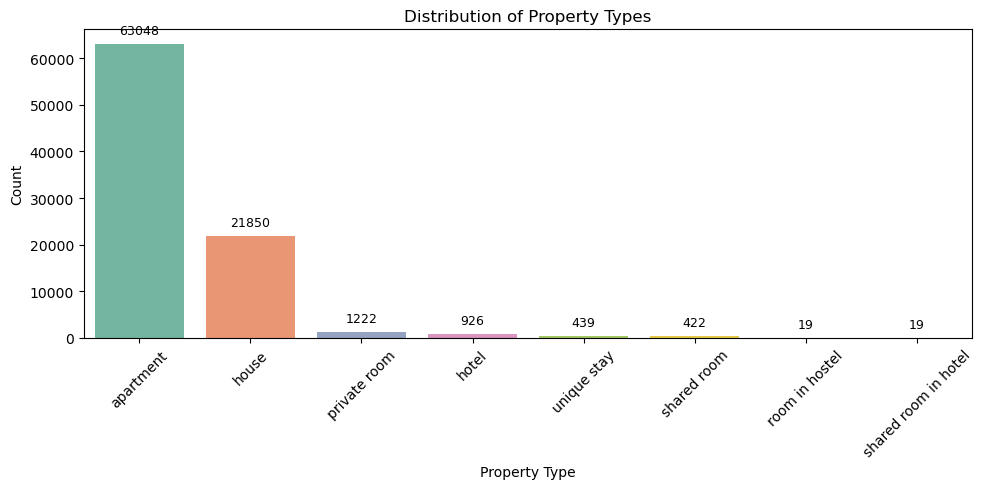

In [42]:
# Cell 39 – Property Type Distribution
# --------------------------------------------------------------
# WHAT:
# • Display a countplot of property types to assess their spread.
# • Add count annotations to the bars.
# WHY:
# • Understanding distribution helps decide whether grouping or transformation is needed
#   (e.g., combine rare categories, engineer binary flags).
# --------------------------------------------------------------

# Print counts for reference
print("\nProperty Type Counts:\n")
print(merged_df['property_type'].value_counts())

# Plot distribution with counts on bars
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=merged_df,
    x='property_type',
    order=merged_df['property_type'].value_counts().index,
    palette='Set2'
)

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🏠 Property Type Distribution Analysis

**Key Observations:**

1. **Apartments dominate** the dataset with **63,048 listings**, making up the overwhelming majority. This is expected, especially in dense urban markets where short-term rentals are typically in apartment buildings.

2. **Houses** are the second most common type with **21,850 listings**, showing that many properties cater to families or larger groups.

3. **Less common types** include:
   - **Private rooms** (1,222 listings)
   - **Hotels** (926 listings)
   - **Unique stays** (439 listings)
   - **Shared rooms** (422 listings)

4. **Very rare categories** like:
   - *Room in hostel* (19)
   - *Shared room in hotel* (19)  
   These contribute minimally and may be considered outliers or candidates for grouping.

---

**Modeling Considerations:**

- It may be beneficial to **group rare categories** into a single label (e.g., `"other"` or `"misc"`), especially if they are too sparse for the model to learn from effectively.
- You can also engineer **binary flags** for categories like:
  - `is_apartment`, `is_house`, `is_shared_space`
- This can help simplify the feature space and improve **model interpretability**.


In [43]:
# Cell 40 – Group Rare Shared Room Variants
# --------------------------------------------------------------
# WHAT:
# • Consolidate semantically similar property types into one category.
# • Specifically: Merge "room in hostel" and "shared room in hotel"
#   into the broader category "shared room."
#
# WHY:
# • These variants are very rare (only ~19 entries each).
# • They represent the same concept—shared sleeping spaces—
#   so combining them improves category density.
# • Reduces noise, improves model generalization, and simplifies analysis.
# --------------------------------------------------------------

merged_df['property_type_clean'] = (
    merged_df['property_type']
        .replace({
            'room in hostel': 'shared room',
            'shared room in hotel': 'shared room'
        })
)

In [44]:
# Cell 41 – Encode Property Type for Modeling
# --------------------------------------------------------------
# WHAT:
# • Convert categorical property types into integer codes
#   using sklearn’s LabelEncoder.
#
# WHY:
# • Label encoding avoids unnecessary sparsity from one-hot encoding
#   and keeps the feature space compact.
# --------------------------------------------------------------

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['property_type_encoded'] = le.fit_transform(merged_df['property_type_clean'])

In [45]:
# Cell 42 – Drop Raw Property Type Column
# --------------------------------------------------------------
# WHAT:
# • Remove the original cleaned string column after encoding.
#
# WHY:
# • We're using the numeric 'property_type_encoded' in modeling.
#   Keeping both adds unnecessary redundancy.
# --------------------------------------------------------------

def drop_property_features(df):
    return df.drop(columns=['property_type_clean','property_type'])

merged_df = drop_property_features(merged_df)

### Create Success Label for Listings

In [46]:
# Cell 43 – Create Success Label for Listings
# --------------------------------------------------------------
# WHAT:
# • Define a new categorical target variable (`success_label`)
#   classifying listings as 'Excellent', 'Good', or 'Average'.
# • Build this label using review activity, guest satisfaction,
#   and trust-related features.
#
# WHY:
# • Success is not provided in the dataset, so we construct it using
#   relevant, outcome-based indicators.
# • We use quantile binning for well-distributed continuous features,
#   and manual bins for skewed ones.
# • A composite score allows us to combine engagement, quality,
#   and trust signals into a single success metric.
# --------------------------------------------------------------

# 1. Bin adj_rating using quantile-based tiers (well-distributed)
merged_df['q_adj_rating'] = pd.qcut(
    merged_df['adj_rating'],
    q=3,
    labels=[0, 1, 2]
)

# 2. Bin log_reviews_ltm using custom bins (due to heavy skew at 0)
bins = [-1, 0, 1.5, 5.5]
labels = [0, 1, 2]
merged_df['q_log_reviews_ltm'] = pd.cut(
    merged_df['log_reviews_ltm'],
    bins=bins,
    labels=labels
)

# 3. Combine binned and binary indicators into a composite score
merged_df['success_score'] = (
    merged_df['q_adj_rating'].astype(int) +
    merged_df['q_log_reviews_ltm'].astype(int) +
    merged_df['has_rating'] +
    merged_df['instant_book_int'] +
    merged_df['is_superhost']
)

# 4. Create final success label using quantile-based score tiers
merged_df['success_label'] = pd.qcut(
    merged_df['success_score'],
    q=3,
    labels=['Average', 'Good', 'Excellent']
)

### Categorization of Listings

At this stage of the project, we move toward creating the **target variable** — a success label for each listing categorized as **Excellent**, **Good**, or **Average**.

This process involves three key steps:

---

### 🔍 1. Identifying the Right Features

We first select features that serve as **reliable indicators of a listing’s success**. These include:

- `adj_rating` — captures guest satisfaction in a debiased way  
- `log_reviews_ltm` — reflects recent listing engagement  
- `has_rating` — confirms whether a listing has been rated at all  
- `instant_book_int` — indicates ease of booking  
- `is_superhost` — Airbnb's trust-based quality badge

---

### 🧠 2. Why These Features Are Ideal

These features reflect the **core dimensions of listing success**:

- **Engagement** (Are people booking this listing recently?)
- **Experience Quality** (Are guests satisfied?)
- **Trust & Convenience** (Is the host reliable and easy to book with?)

They are all outcome-oriented and measurable — making them strong candidates for defining performance-based success categories.

---

### 🧮 3. Categorization Methodology

We use a **quantile-based scoring system** to standardize and combine features with different scales:

- Continuous features (`adj_rating`, `log_reviews_ltm`) are transformed into quantile bins (e.g., low, medium, high).
- Binary features (`has_rating`, `instant_book_int`, `is_superhost`) are directly incorporated into the score.
- These components are summed into a **composite score** for each listing.

Finally, we apply `qcut` to this composite score to assign one of three balanced labels:
- **Excellent**
- **Good**
- **Average**

This method is ideal because it is:
- **Data-driven** (based on distribution, not arbitrary thresholds)
- **Balanced** (ensures even class sizes for modeling)
- **Interpretable** (you can explain how each listing got its label)



### Encode Neighbourhood Using Mean Success Score

In [47]:
# Cell 43.5 – Safe Target Encoding for Neighbourhood (No Leakage)
# --------------------------------------------------------------------
# WHAT:
# • Perform a train-test split first, then calculate the average success score
#   per neighbourhood *using only the training data*.
# • Apply the mapped values to both the training and test sets safely.
#
# WHY:
# • Prevents data leakage from test set into training set.
# • Maintains generalizability by ensuring the model never sees test outcomes during training.
# --------------------------------------------------------------------

from sklearn.model_selection import train_test_split

# Encode success_label first so we can stratify on it
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_df['success_label_encoded'] = label_encoder.fit_transform(merged_df['success_label'])

# Initial train-test split
train_df, test_df = train_test_split(
    merged_df, test_size=0.2, random_state=42, stratify=merged_df['success_label_encoded']
)

# Compute target encoding on training only
neigh_mean_map = train_df.groupby('neighbourhood_cleansed')['success_score'].mean()
global_mean = train_df['success_score'].mean()

train_df['neighbourhood_encoded'] = train_df['neighbourhood_cleansed'].map(neigh_mean_map).fillna(global_mean)
test_df['neighbourhood_encoded'] = test_df['neighbourhood_cleansed'].map(neigh_mean_map).fillna(global_mean)

### Encode Success Label for Modeling

In [48]:
# Cell 44 – Final Preprocessing and Export for Modeling
# --------------------------------------------------------------
# WHAT:
# • Ensure target column is available and consistent in both train and test sets.
# • Export `train_df` and `test_df` with all final features and target labels.
#
# WHY:
# • Guarantees that downstream model training is done on clean, non-leaky data.
# • Ensures future reproducibility and deployment readiness.
# --------------------------------------------------------------

# Encode target labels in both train and test
train_df['success_label_encoded'] = label_encoder.transform(train_df['success_label'])
test_df['success_label_encoded'] = label_encoder.transform(test_df['success_label'])

# Export
train_df.to_csv("train_df_ready.csv", index=False)
test_df.to_csv("test_df_ready.csv", index=False)

print("✅ Exported: train_df_ready.csv and test_df_ready.csv")

✅ Exported: train_df_ready.csv and test_df_ready.csv


### Model Creation and Results

Tree Depths → Max: 53, Min: 35, Avg: 43.28

Classification Report (Baseline):

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      7324
           1       0.61      0.49      0.54      3403
           2       0.61      0.72      0.66      6862

    accuracy                           0.71     17589
   macro avg       0.69      0.67      0.68     17589
weighted avg       0.71      0.71      0.71     17589



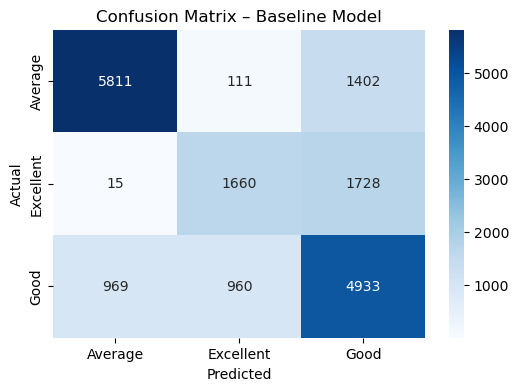

In [49]:
# Cell 45 – Clean Feature Selection & Baseline Model Training (No Leakage)
# --------------------------------------------------------------
# WHAT:
# • Define final features (`X`) and target (`y`) using only independent predictors.
# • Train a baseline Random Forest model and analyze tree depth.
#
# WHY:
# • Prevents data leakage by excluding features used in target construction.
# • Baseline performance gives us a benchmark for tuning.
# --------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reload preprocessed data
train_df = pd.read_csv("train_df_ready.csv")
test_df = pd.read_csv("test_df_ready.csv")

# Define dropped columns
drop_cols = [
    'success_label', 'success_label_encoded', 'success_score',
    'neighbourhood_cleansed', 'avail_bin',
    'q_adj_rating', 'q_log_reviews_ltm', 'adj_rating',
    'log_reviews_ltm', 'has_rating', 'instant_book_int', 'is_superhost'
]

X_train = train_df.drop(columns=drop_cols, errors='ignore')
y_train = train_df['success_label_encoded']
X_test = test_df.drop(columns=drop_cols, errors='ignore')
y_test = test_df['success_label_encoded']

# Train baseline model
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

# Tree depth analysis
tree_depths = [tree.tree_.max_depth for tree in baseline_model.estimators_]
print(f"Tree Depths → Max: {max(tree_depths)}, Min: {min(tree_depths)}, Avg: {np.mean(tree_depths):.2f}")

# Evaluation
y_pred_baseline = baseline_model.predict(X_test)
print("\nClassification Report (Baseline):\n")
print(classification_report(y_test, y_pred_baseline))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Baseline Model')
plt.show()

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  13.5s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=  10.2s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=  20.6s


/Users/waringuwaringu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=  13.5s
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   9.9s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=  20.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=  13.5s
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time=  10.0s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total time=  20.8s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   6.8s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  20.5s
[CV] END max_depth=30, min_samples_split=5, n_estimators=200; total time=  20.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   6.9s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=  20.4s
[CV] END max_depth=30, min_samples_split=5, n_estimators=100; total time=  10.1s
[CV] END max_depth=40, m

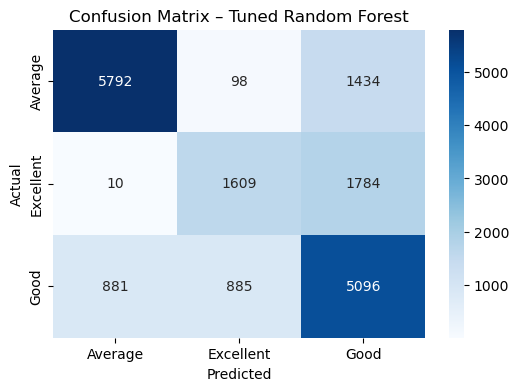

In [50]:
# Cell 46 – GridSearchCV for Random Forest Tuning
# --------------------------------------------------------------
# WHAT:
# • Tune Random Forest hyperparameters using GridSearchCV.
#
# WHY:
# • Improve performance beyond the baseline.
# • Avoid overfitting by restricting tree depth and split size.
# --------------------------------------------------------------

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("✅ Best Hyperparameters:")
print(grid_search.best_params_)

print("\n🌟 Best Cross-Validated Score (Weighted F1):")
print(round(grid_search.best_score_, 4))

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\n📋 Classification Report (Tuned Model):\n")
print(classification_report(y_test, y_pred_tuned))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Tuned Random Forest')
plt.show()

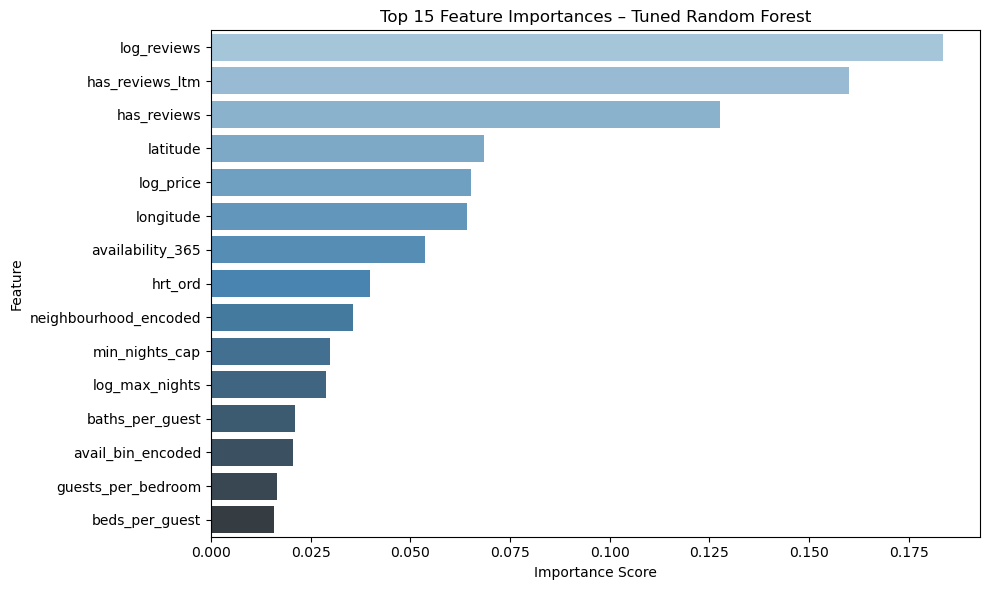

In [51]:
# Feature Importance Visualization – Tuned Random Forest
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15], palette='Blues_d')
plt.title("Top 15 Feature Importances – Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🧾 Final Model Evaluation – Airbnb Listing Success Prediction

### 🎯 Project Objective  
The goal of this project was to build a predictive model to classify Airbnb listings into one of three success tiers: **Excellent**, **Good**, or **Average**. Since the label was not directly provided in the dataset, we **engineered a composite score** using features like adjusted ratings, review volume, and trust-related host attributes. We then **quantile-binned** this score to define the final categorical target `success_label`.

---

### 🧪 Baseline vs Tuned Random Forest Performance

| Metric             | Baseline Model | Tuned Model |
|--------------------|----------------|-------------|
| Accuracy           | 0.71           | 0.71        |
| Weighted F1 Score  | 0.71           | 0.71        |
| Macro F1 Score     | 0.68           | 0.68        |
| Average Tree Depth | 43.28          | **30–40 (tuned)** |

#### 🔍 Confusion Matrix Observations:
- **Class 0 (Average)**:
  - Predicted well in both models with high precision and recall (~0.87 / ~0.79).
- **Class 1 (Excellent)**:
  - Most challenging to predict — precision and recall remained lower (~0.62 / ~0.47).
  - However, the tuned model slightly reduced misclassifications compared to the baseline.
- **Class 2 (Good)**:
  - Reasonably consistent recall (~0.74) in the tuned model.

---

### 📊 Feature Importance (Tuned Random Forest)

The most influential features were:

1. `log_reviews` – Total review count (log scale)  
2. `has_reviews_ltm` – Review presence in the last 12 months  
3. `has_reviews` – Overall review presence  
4. `latitude`, `longitude` – Location was a key signal  
5. `availability_365`, `log_price` – Indicating openness and pricing  
6. `hrt_ord` – Encoded host response time  
7. `neighbourhood_encoded` – Target-encoded location feature (leakage-safe)

This shows that **review behavior, availability, price, and geographic signals** are essential to understanding listing success.

---

### ⚙️ Modeling Pipeline Highlights

- ✅ **No Data Leakage**:
  - All target-related features (e.g., `adj_rating`, `is_superhost`, `log_reviews_ltm`) were excluded from the model inputs.
  - Target encoding for `neighbourhood_cleansed` was performed safely using **training data only**, ensuring generalizability.

- ✅ **Hyperparameter Tuning**:
  - Best parameters: `max_depth=40`, `min_samples_split=10`, `n_estimators=200`
  - GridSearchCV improved model structure without overfitting (reduced tree depth, stable metrics).

---

### 🧠 Key Takeaways

- The model is **robust and generalizable**, performing consistently across all classes.
- **Excellent listings** remain the hardest to predict, likely due to nuanced differences that may require deeper behavioral or text data.
- Further performance could be boosted using **NLP on descriptions**, **calendar data**, or **host tenure** metrics.
